In [8]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x800 with 0 Axes>

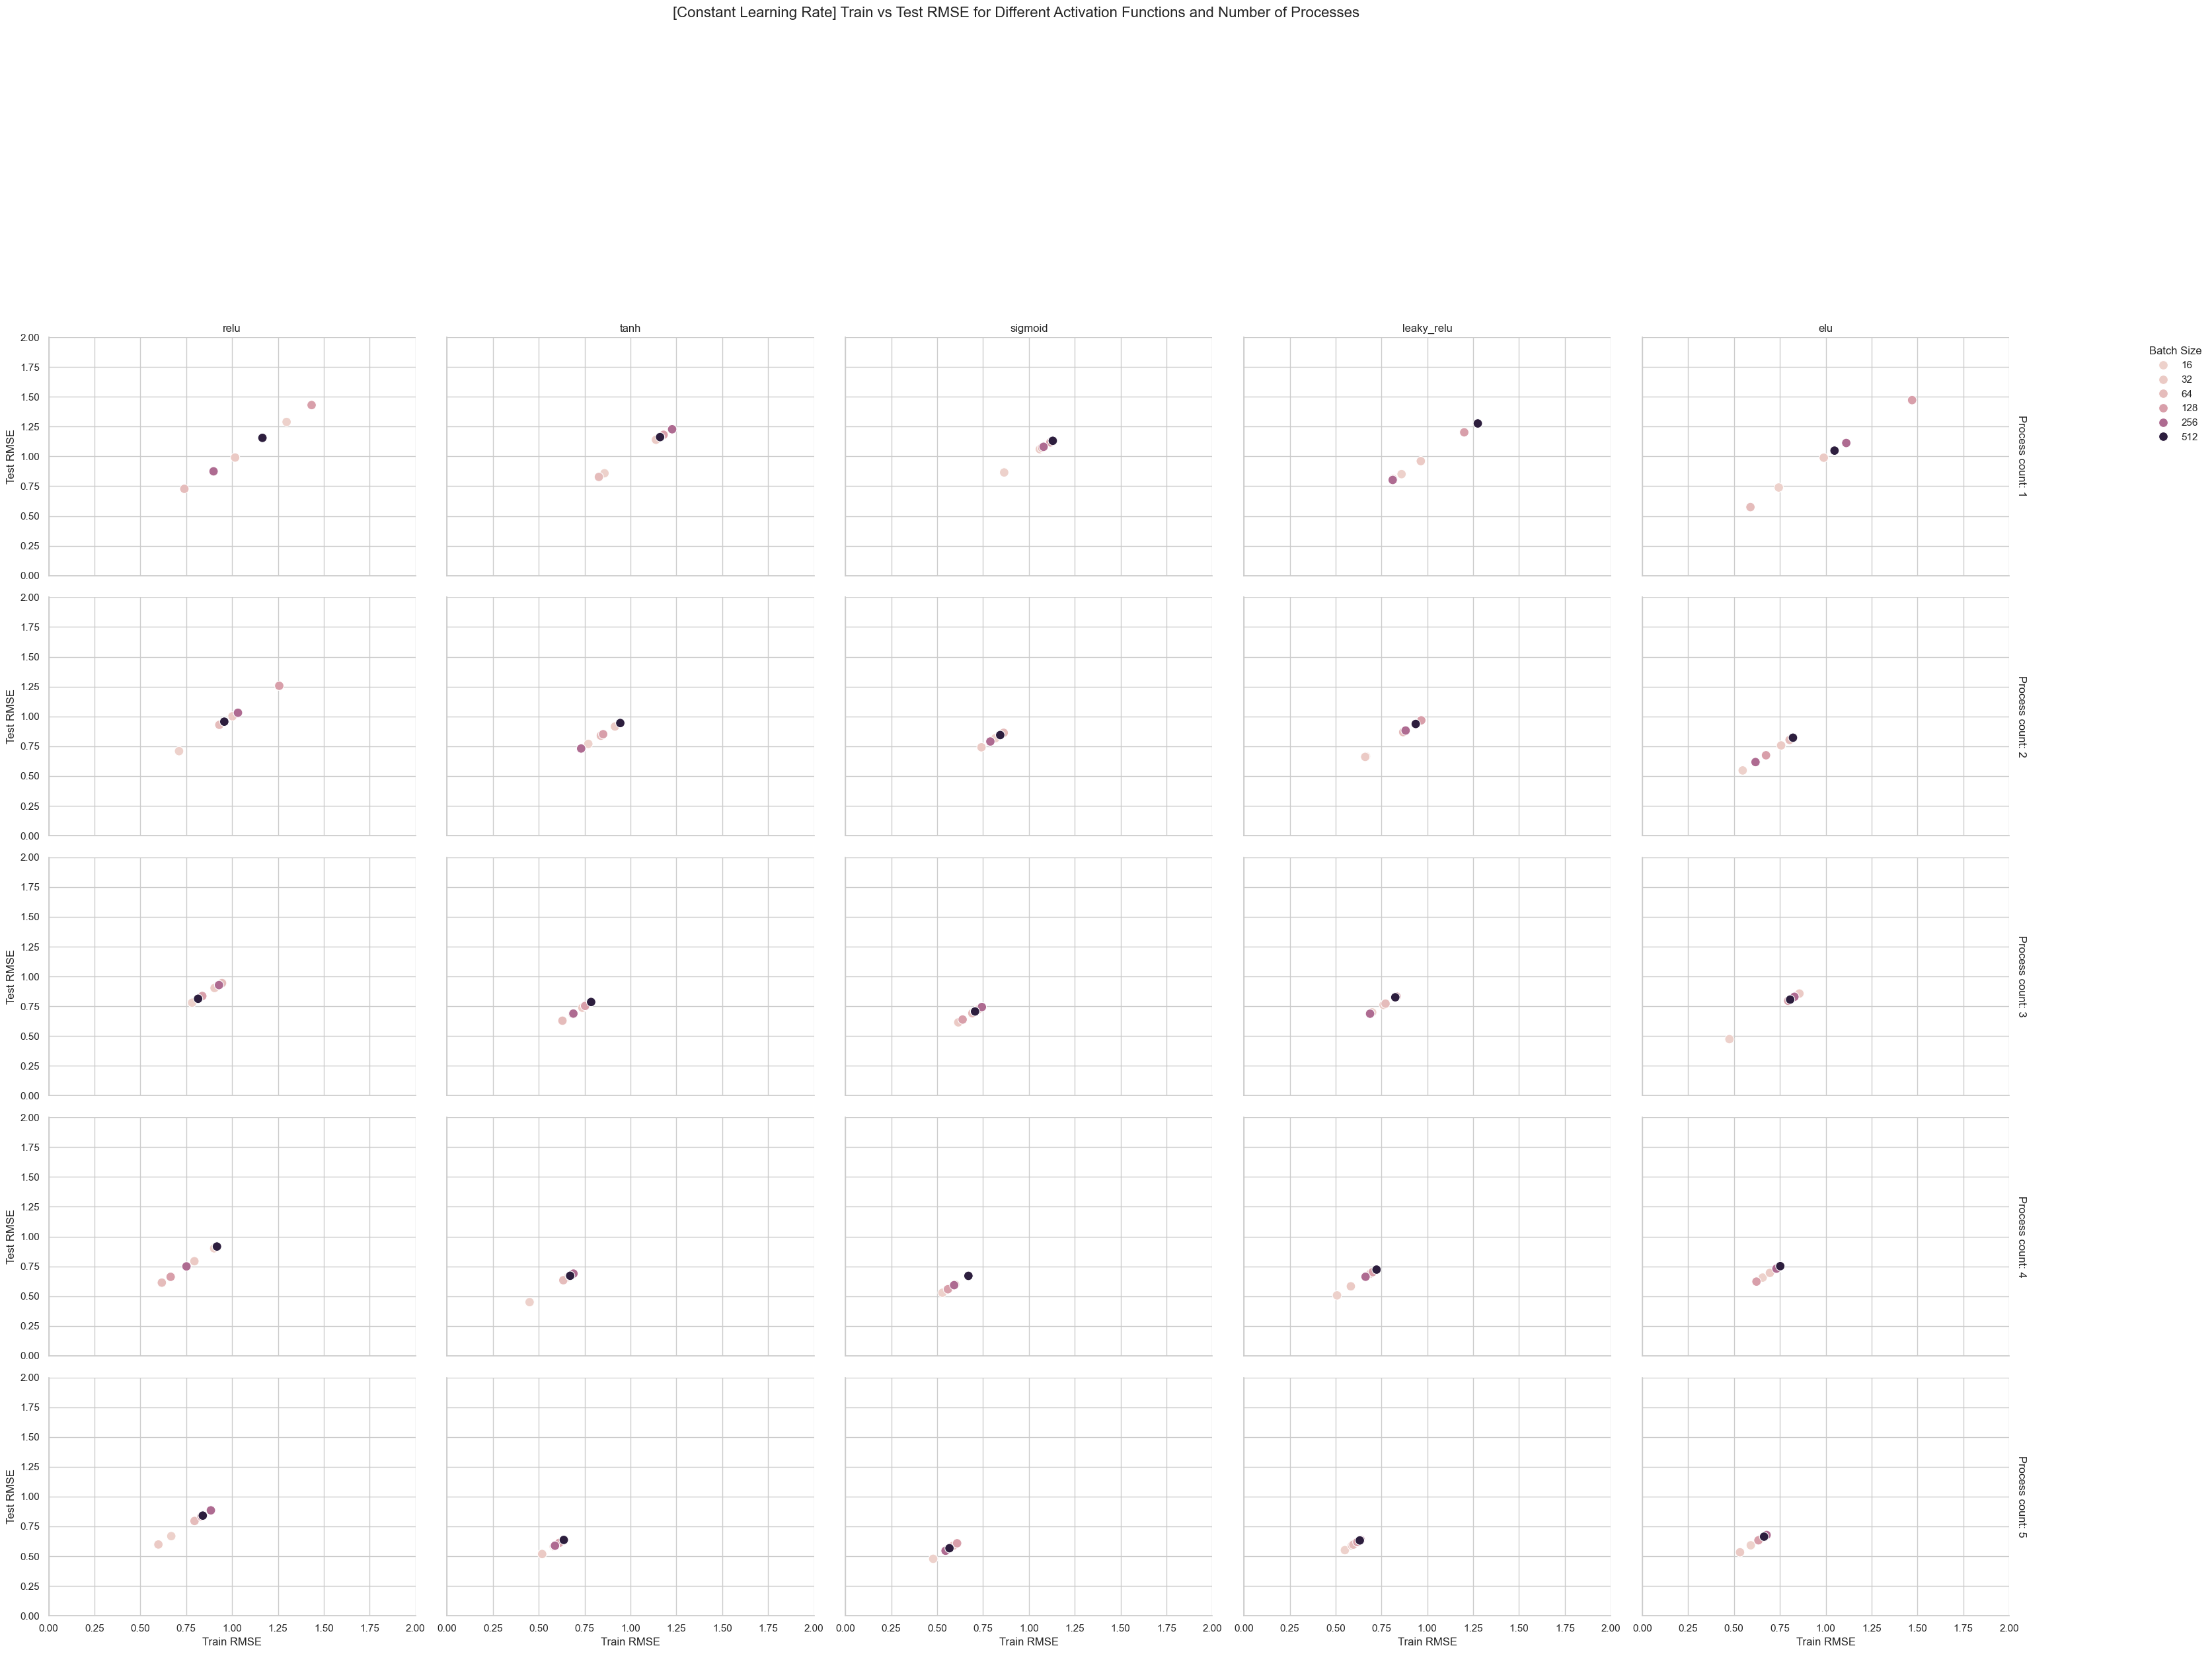

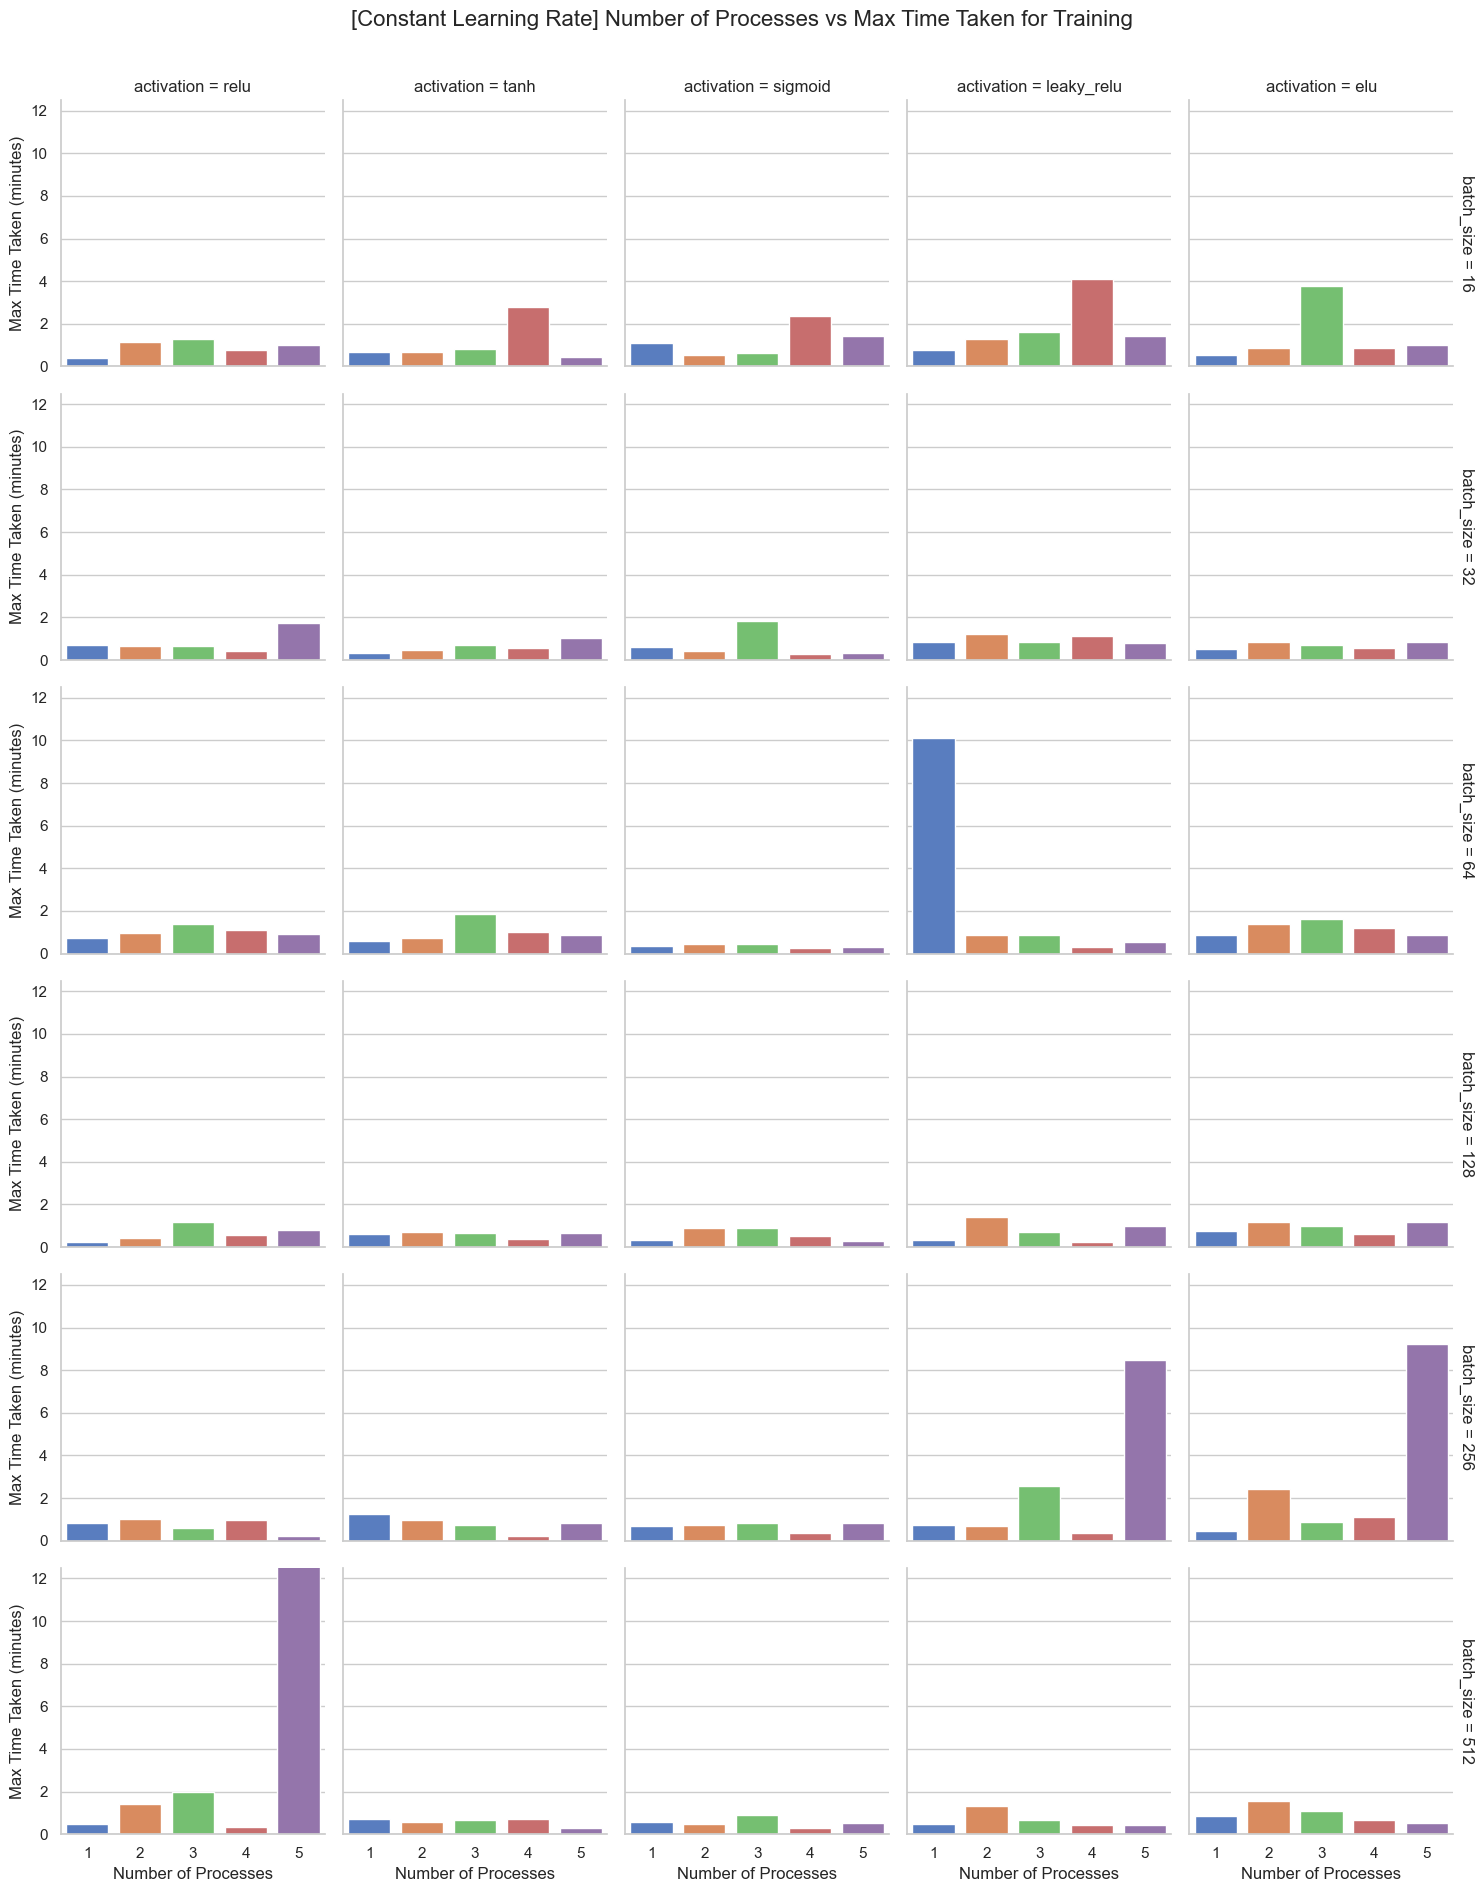

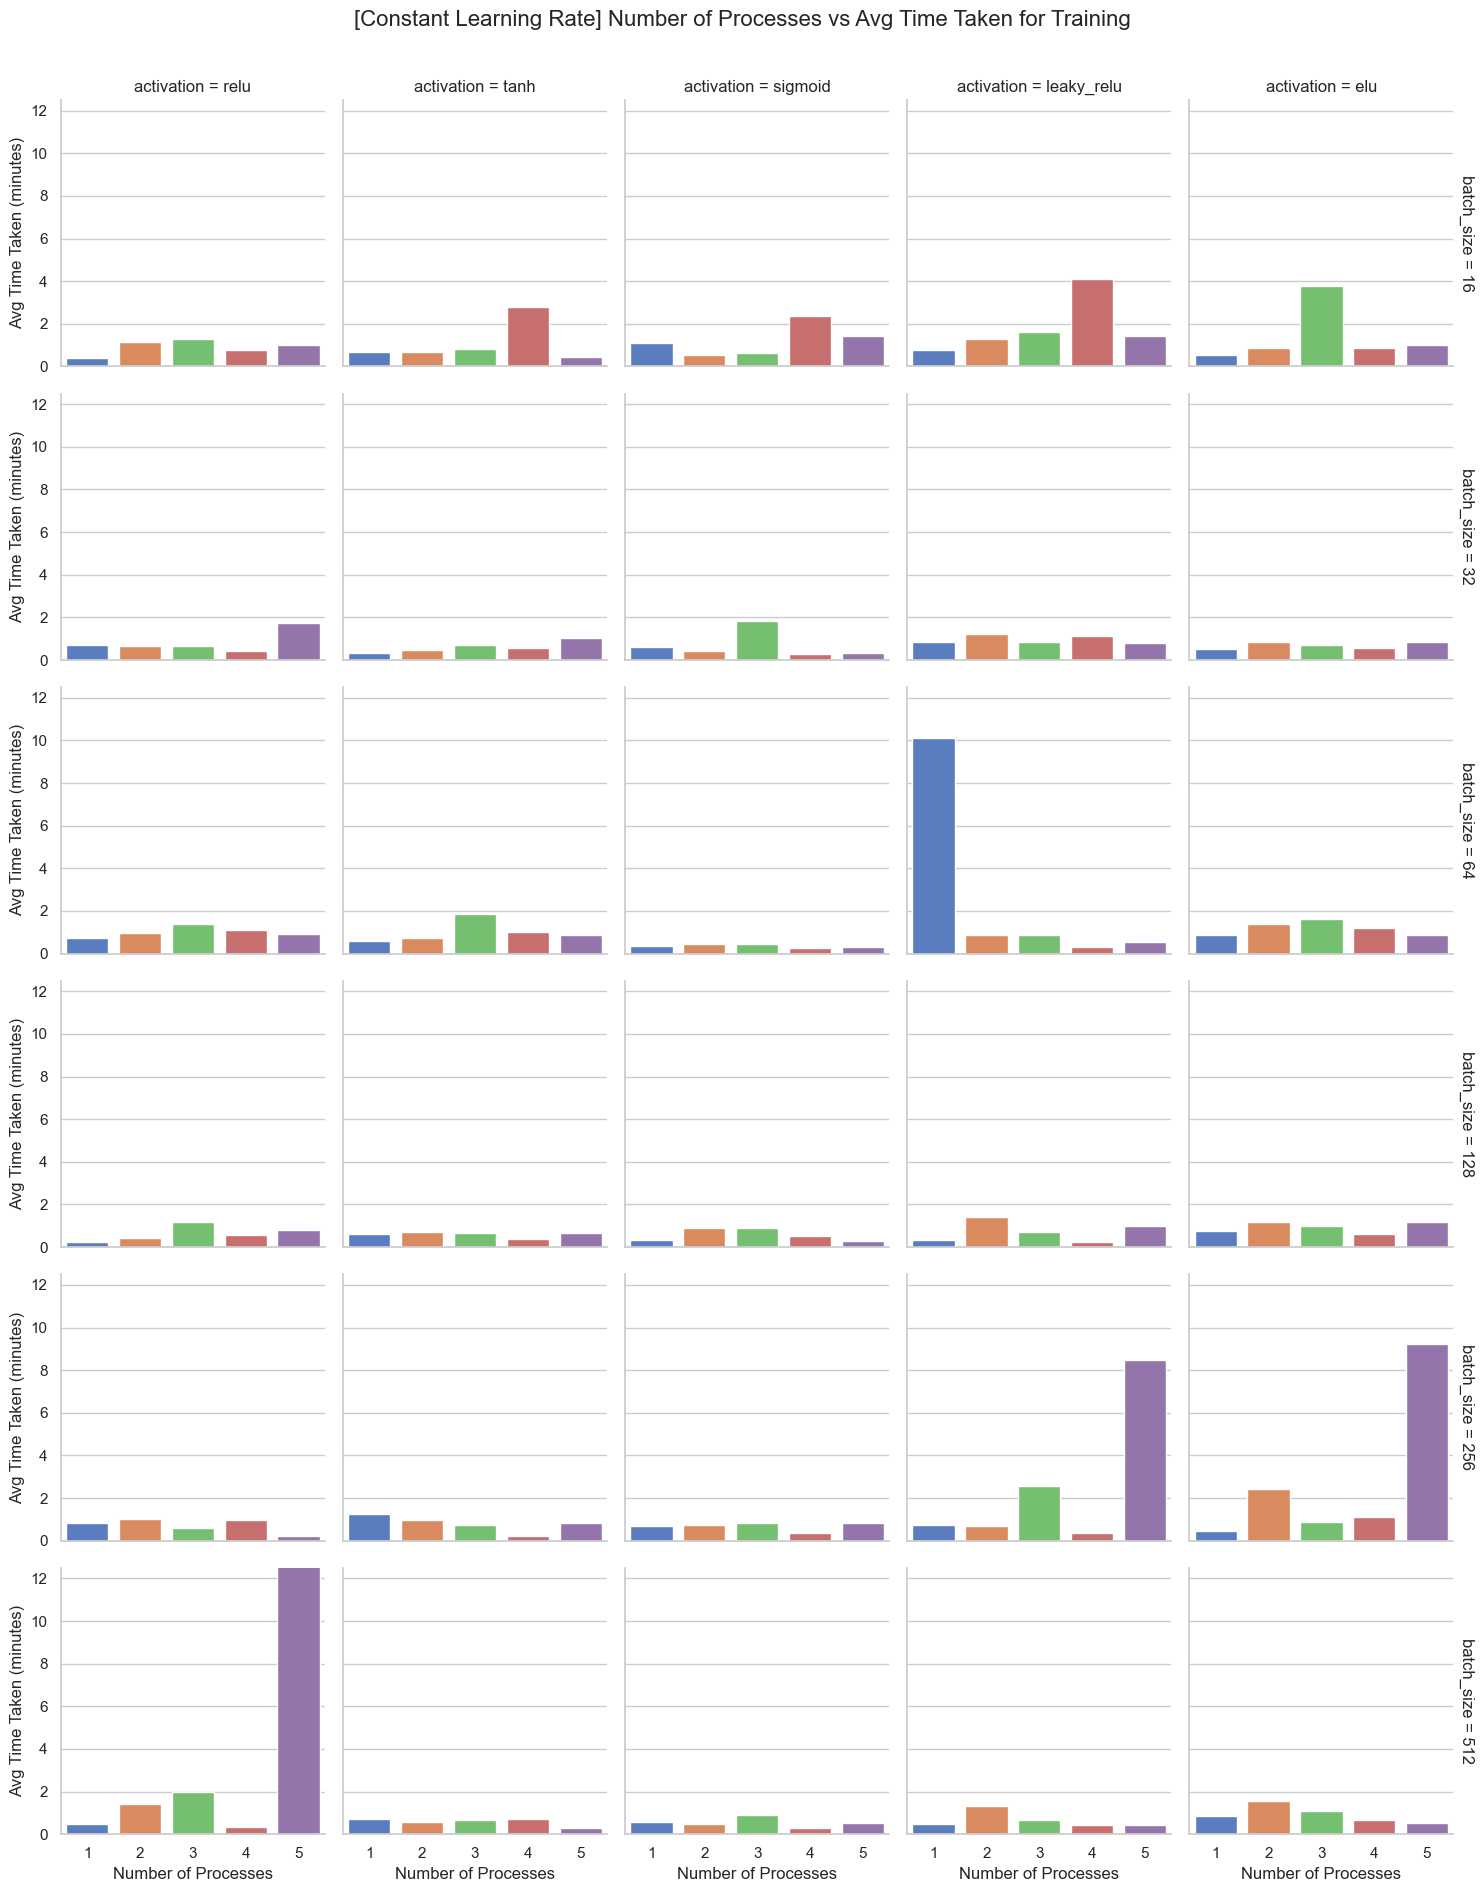

<Figure size 1200x600 with 0 Axes>

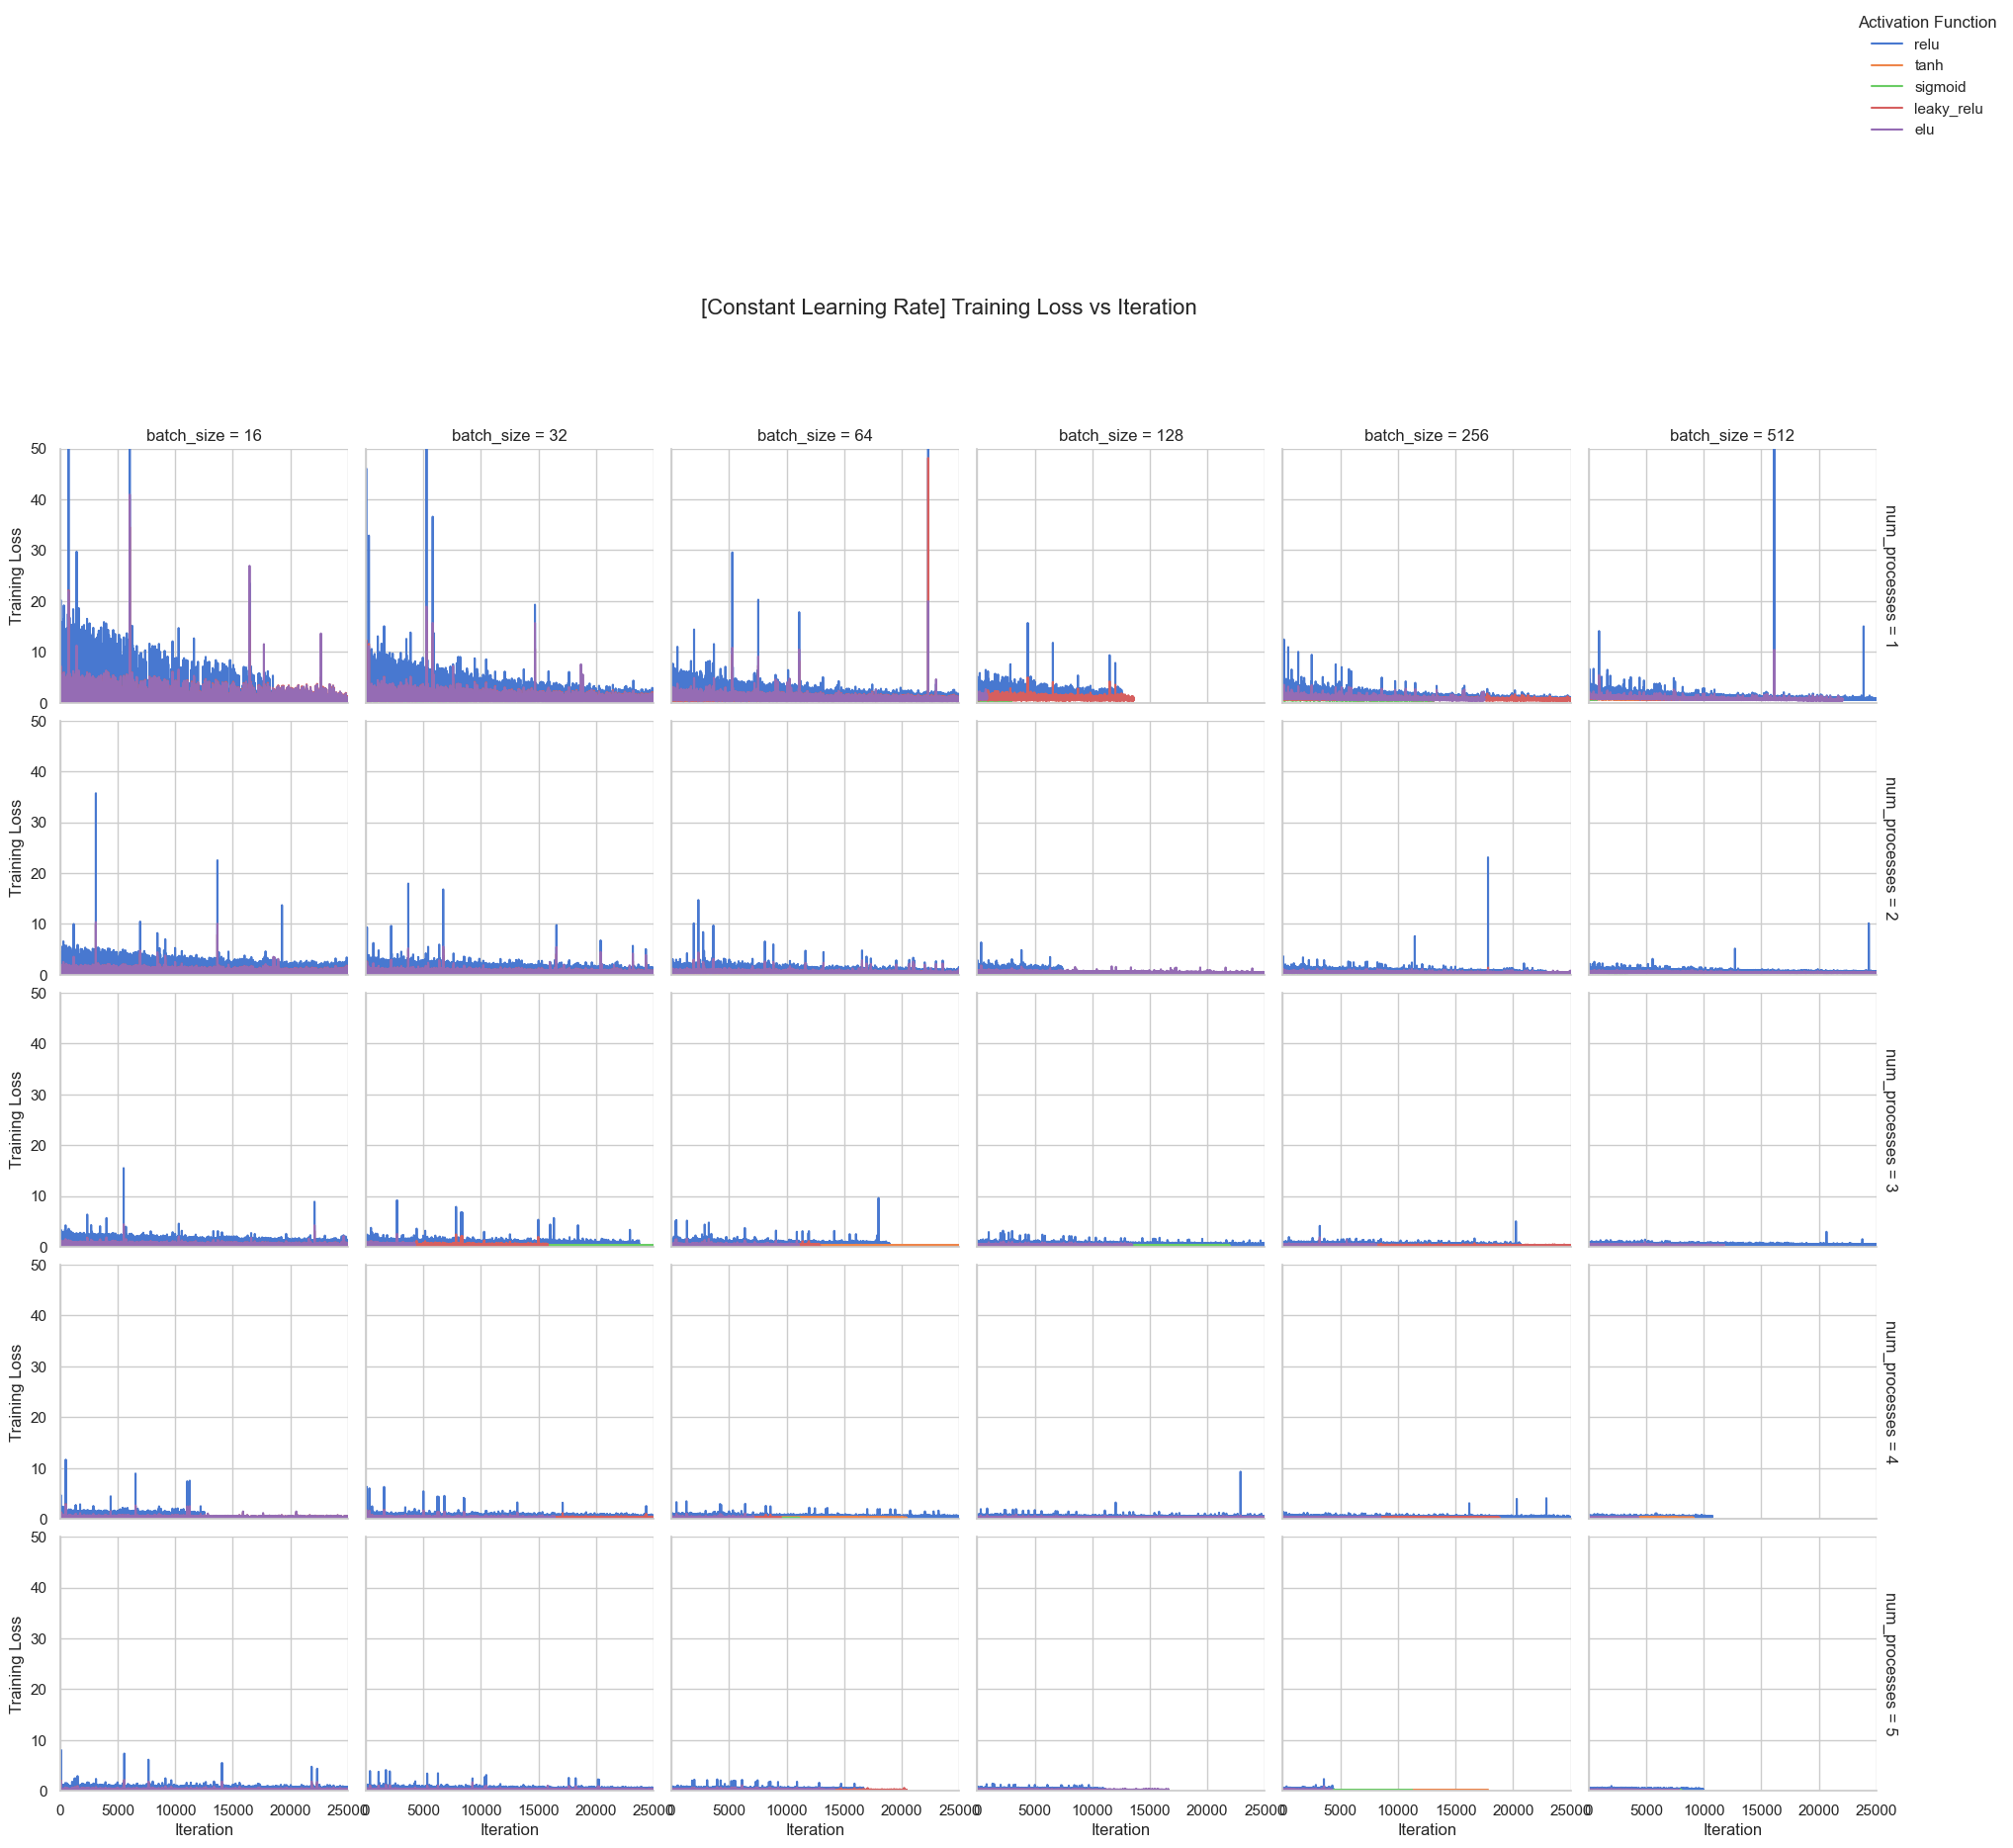

<Figure size 1200x600 with 0 Axes>

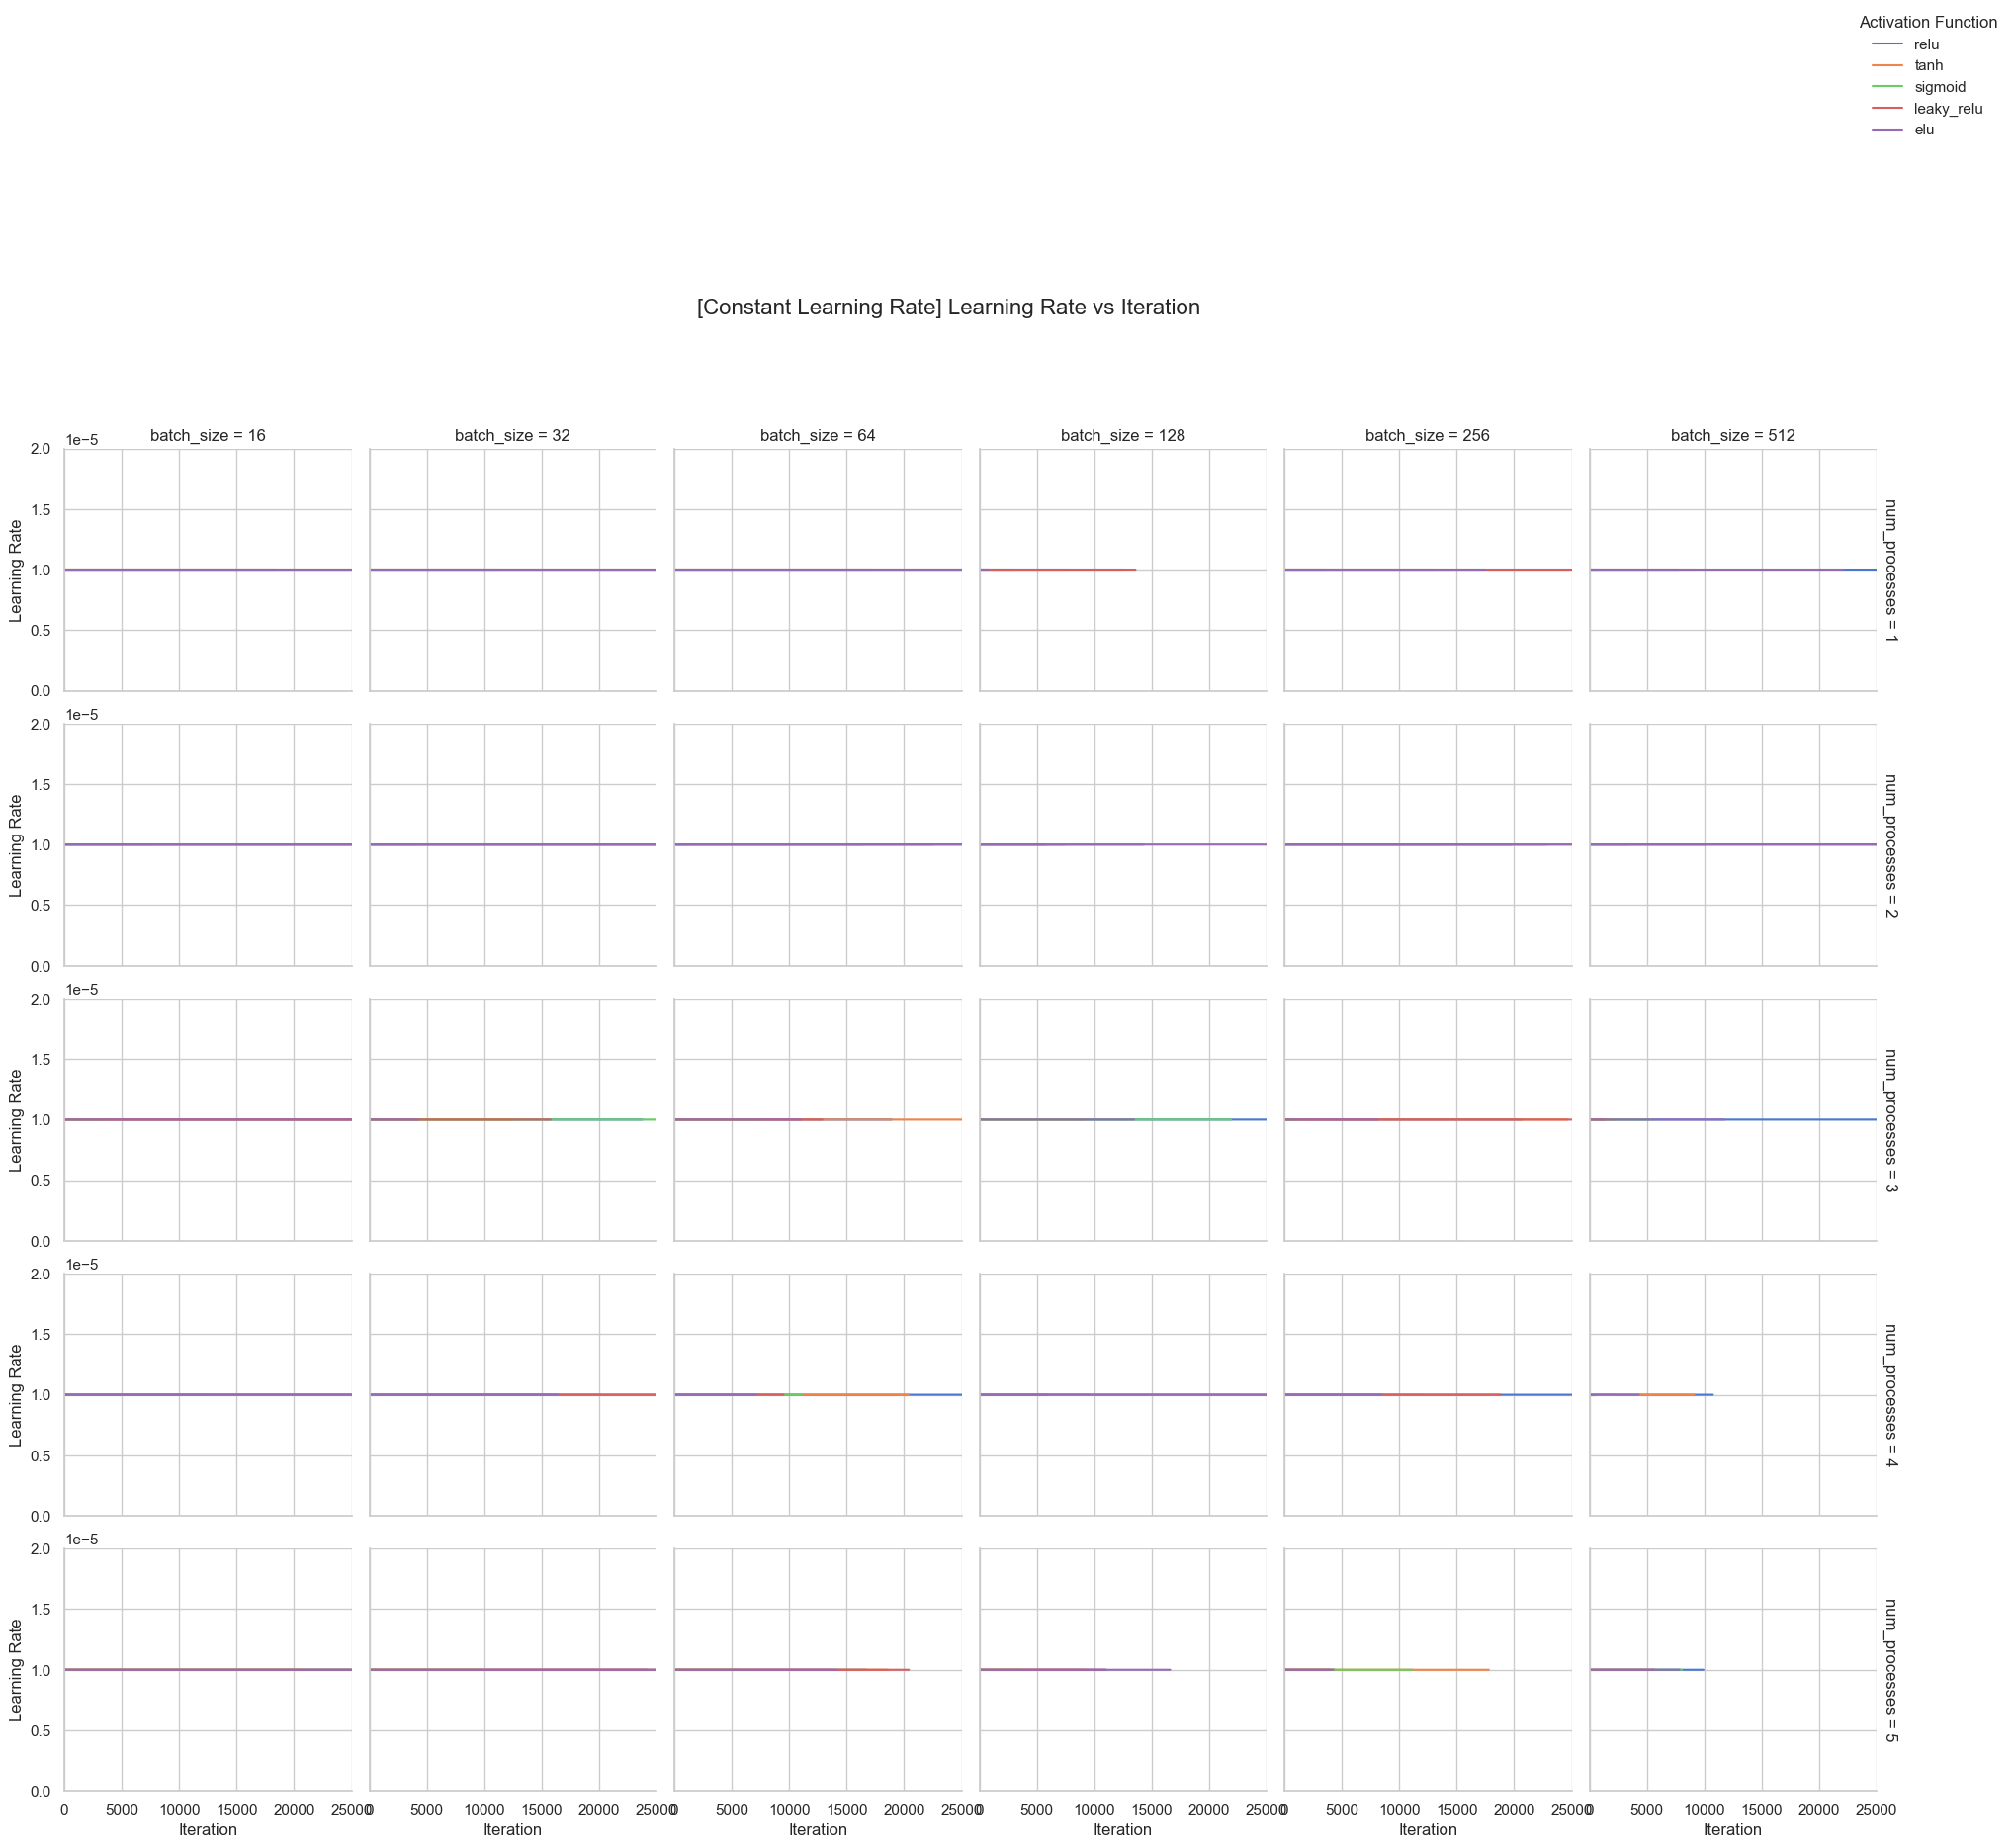

<Figure size 1000x800 with 0 Axes>

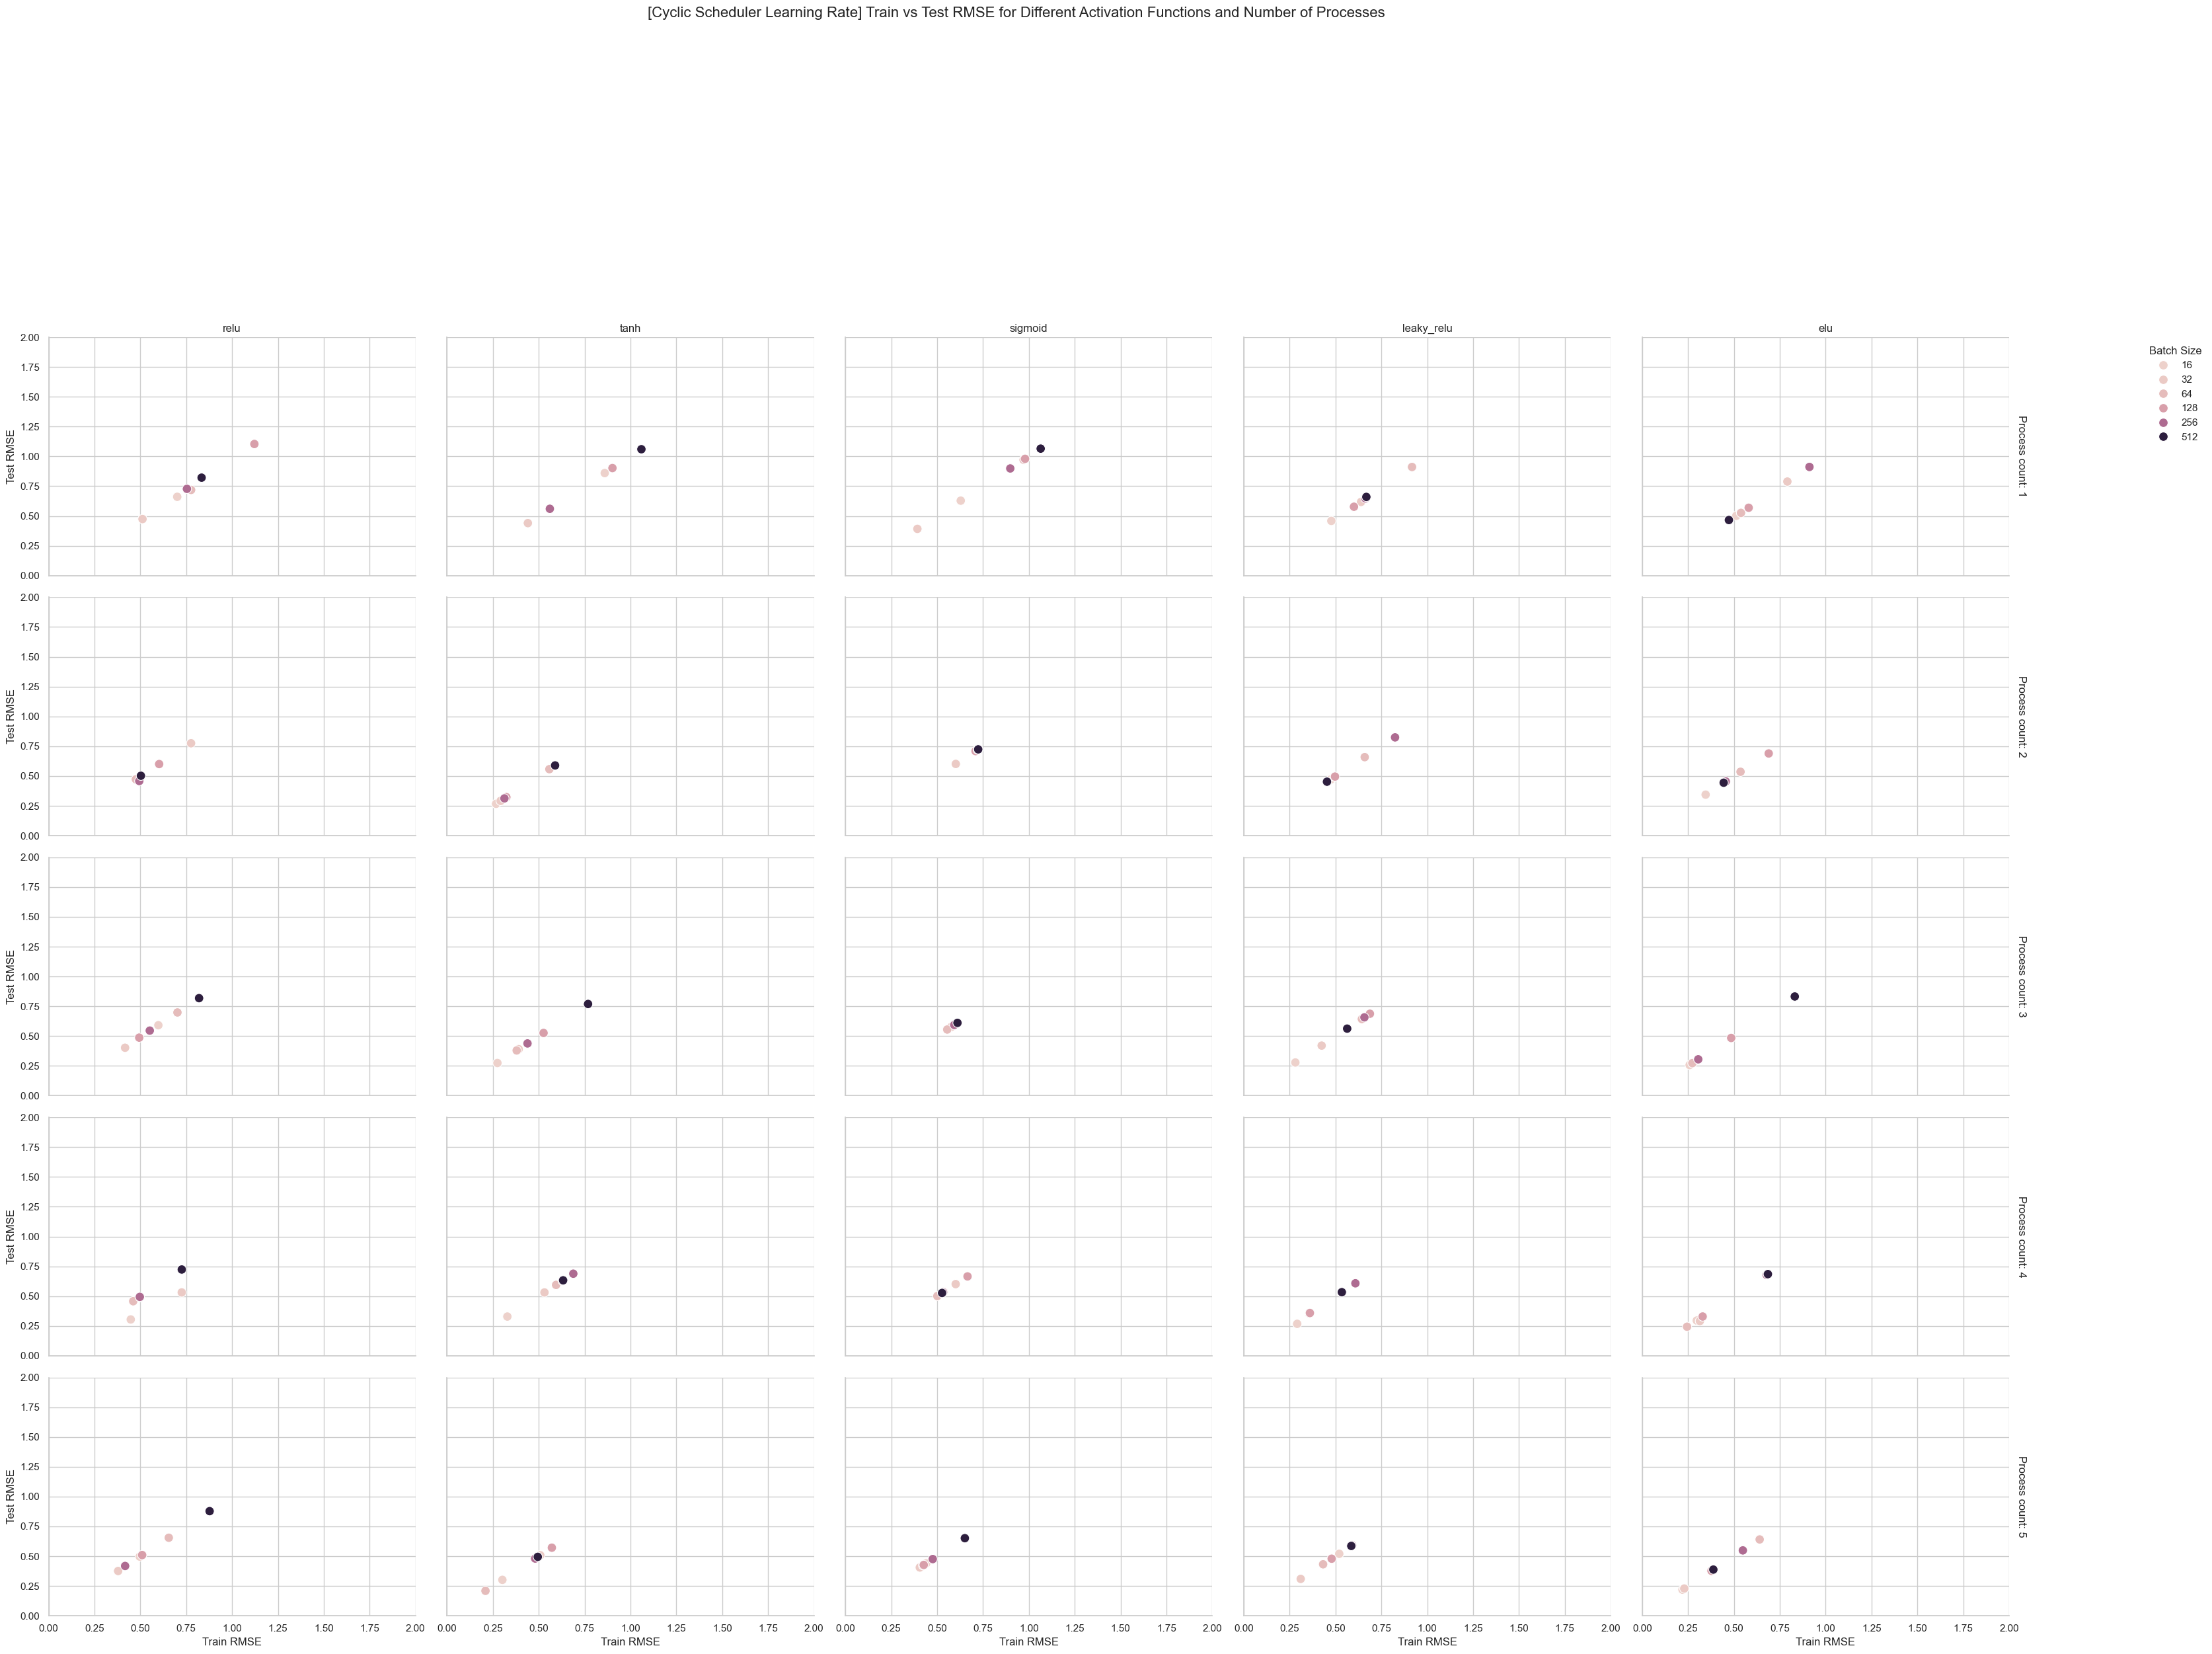

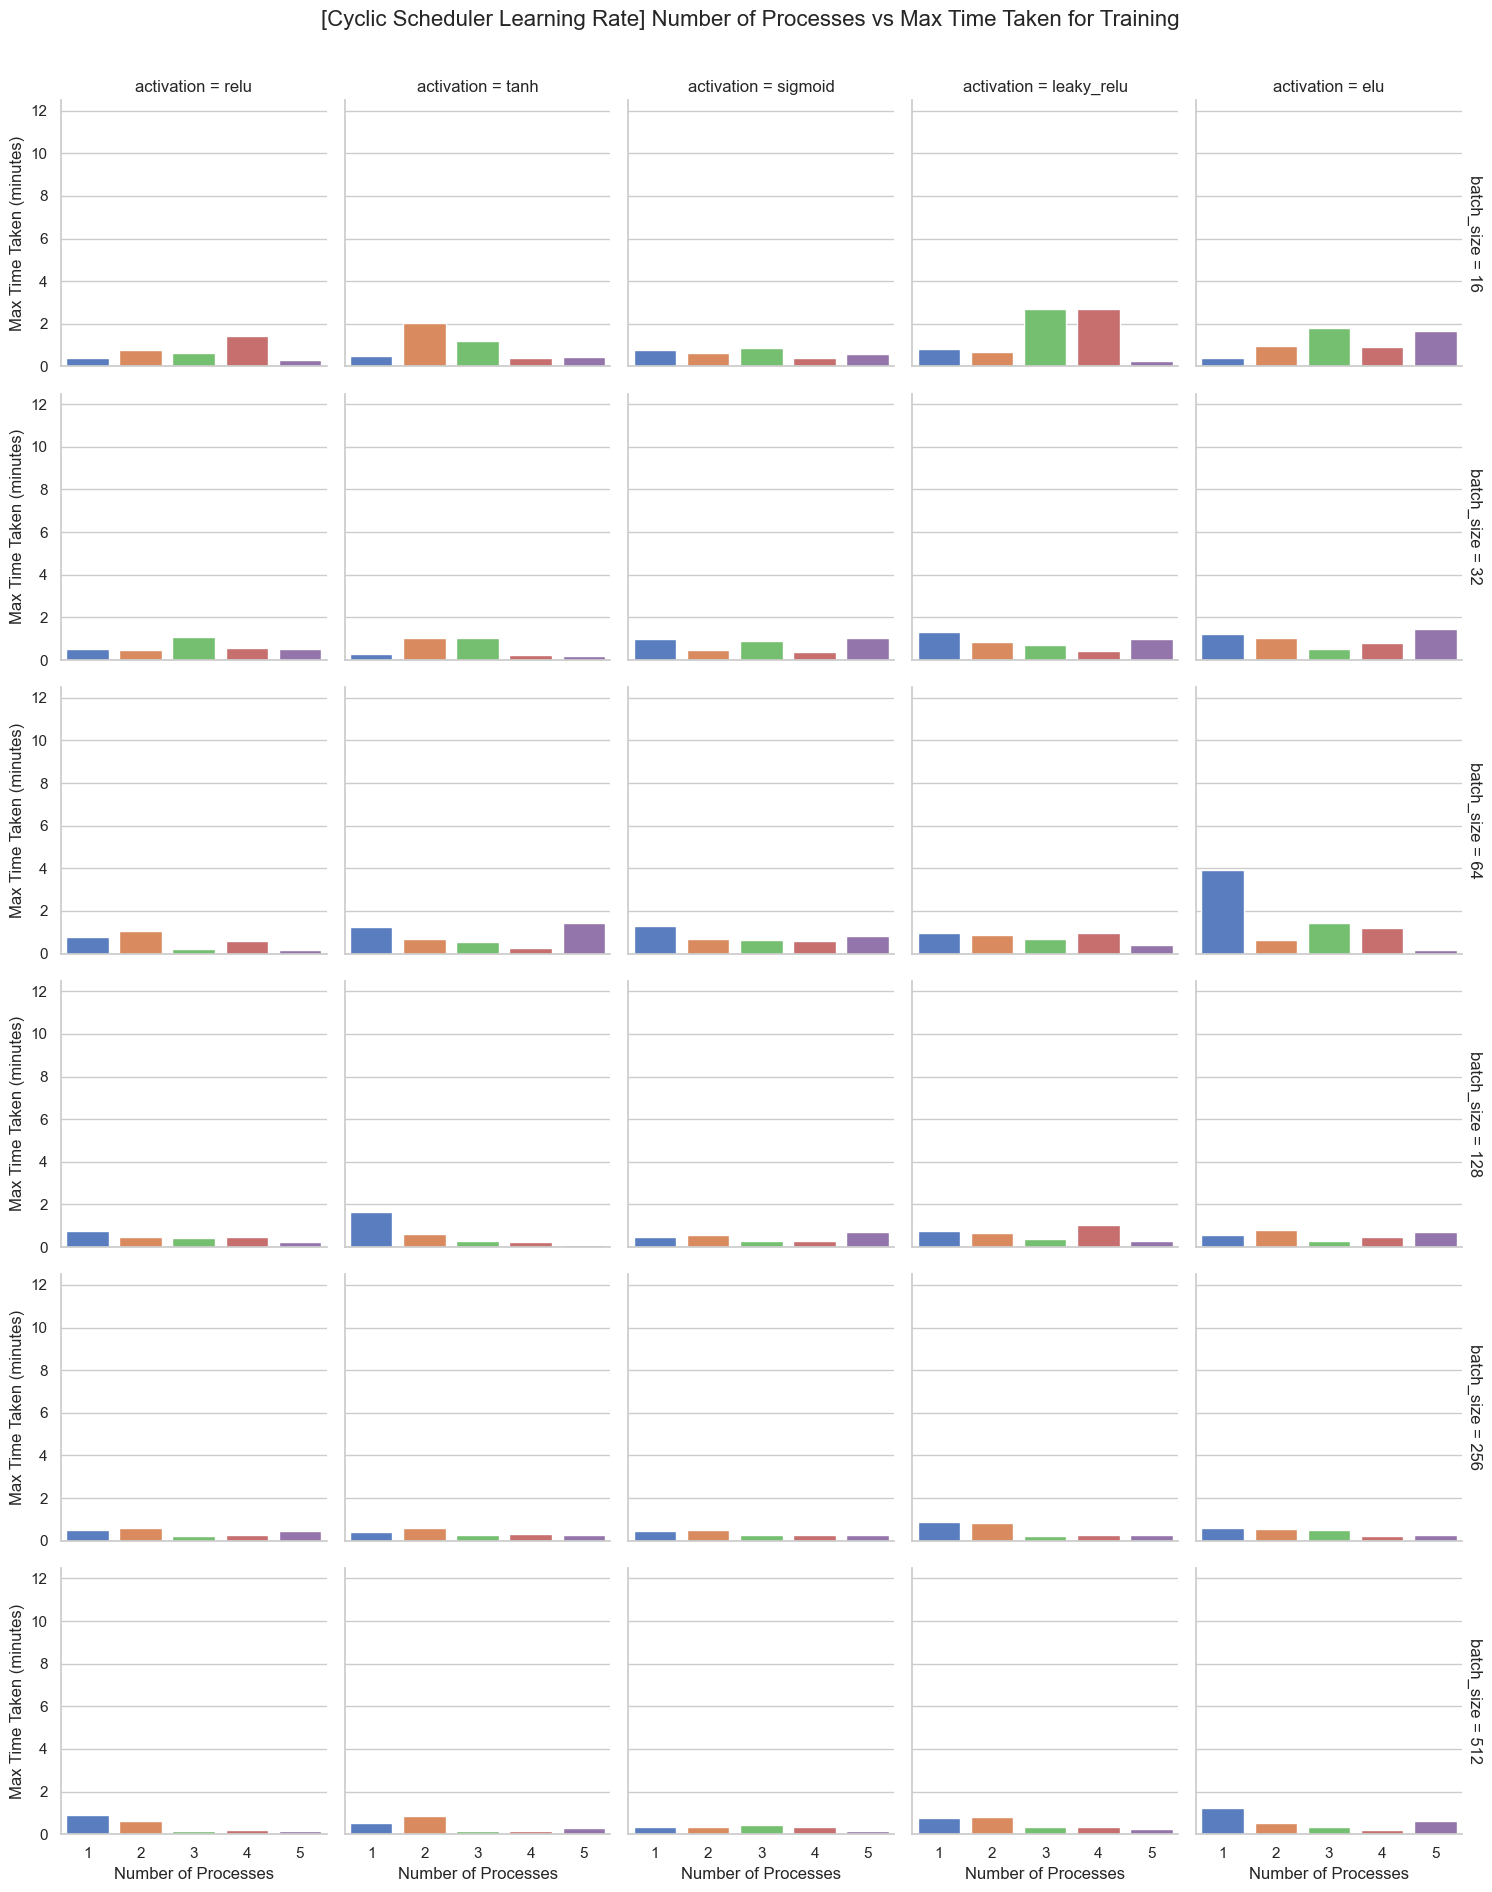

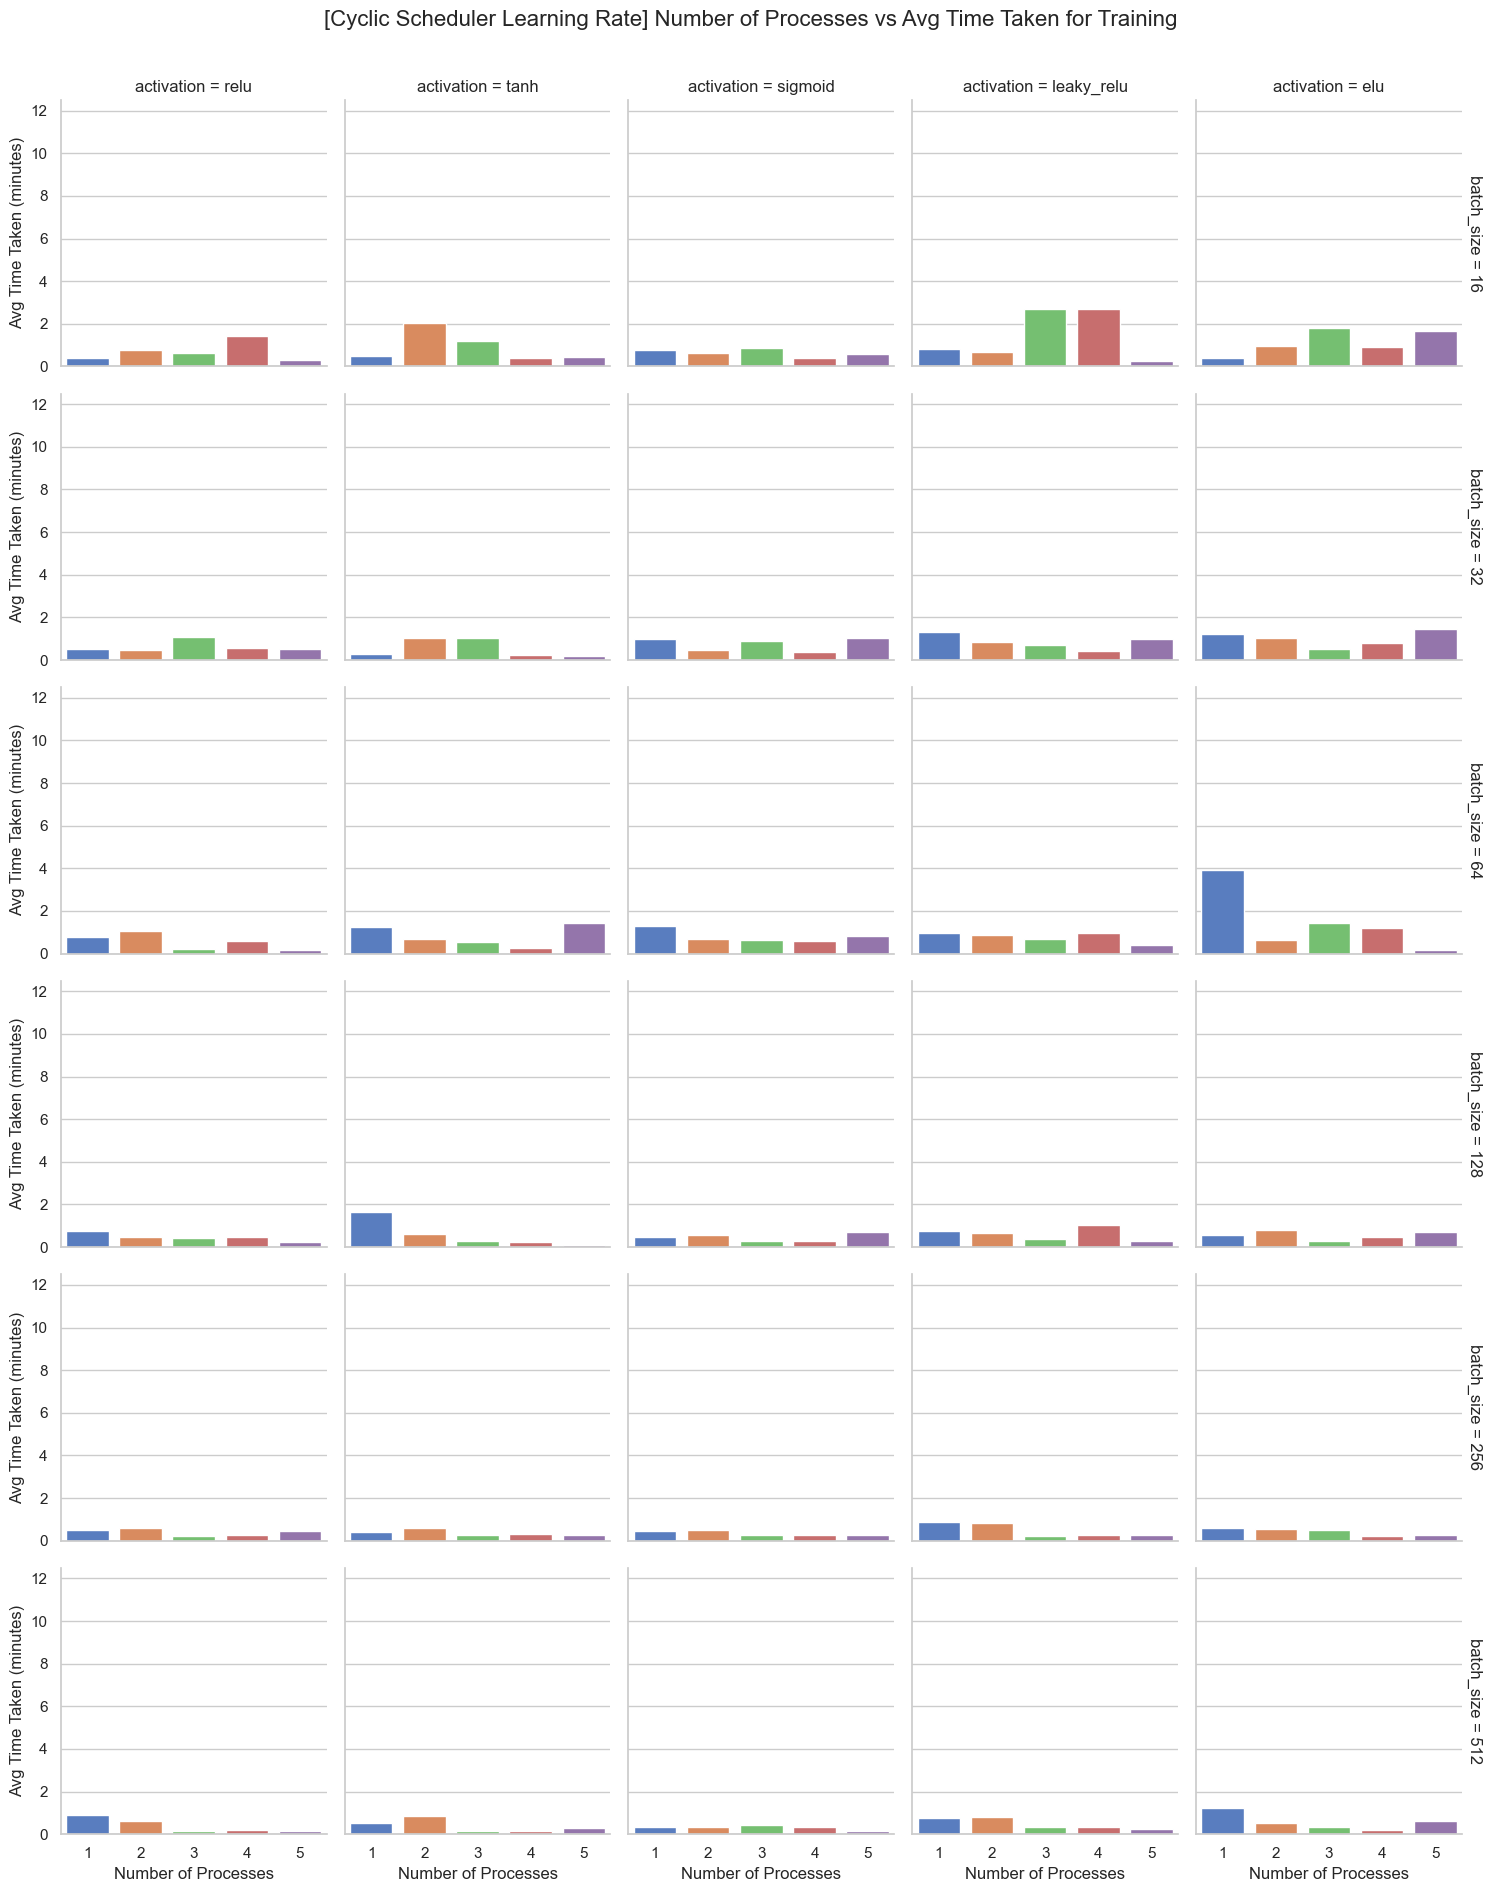

<Figure size 1200x600 with 0 Axes>

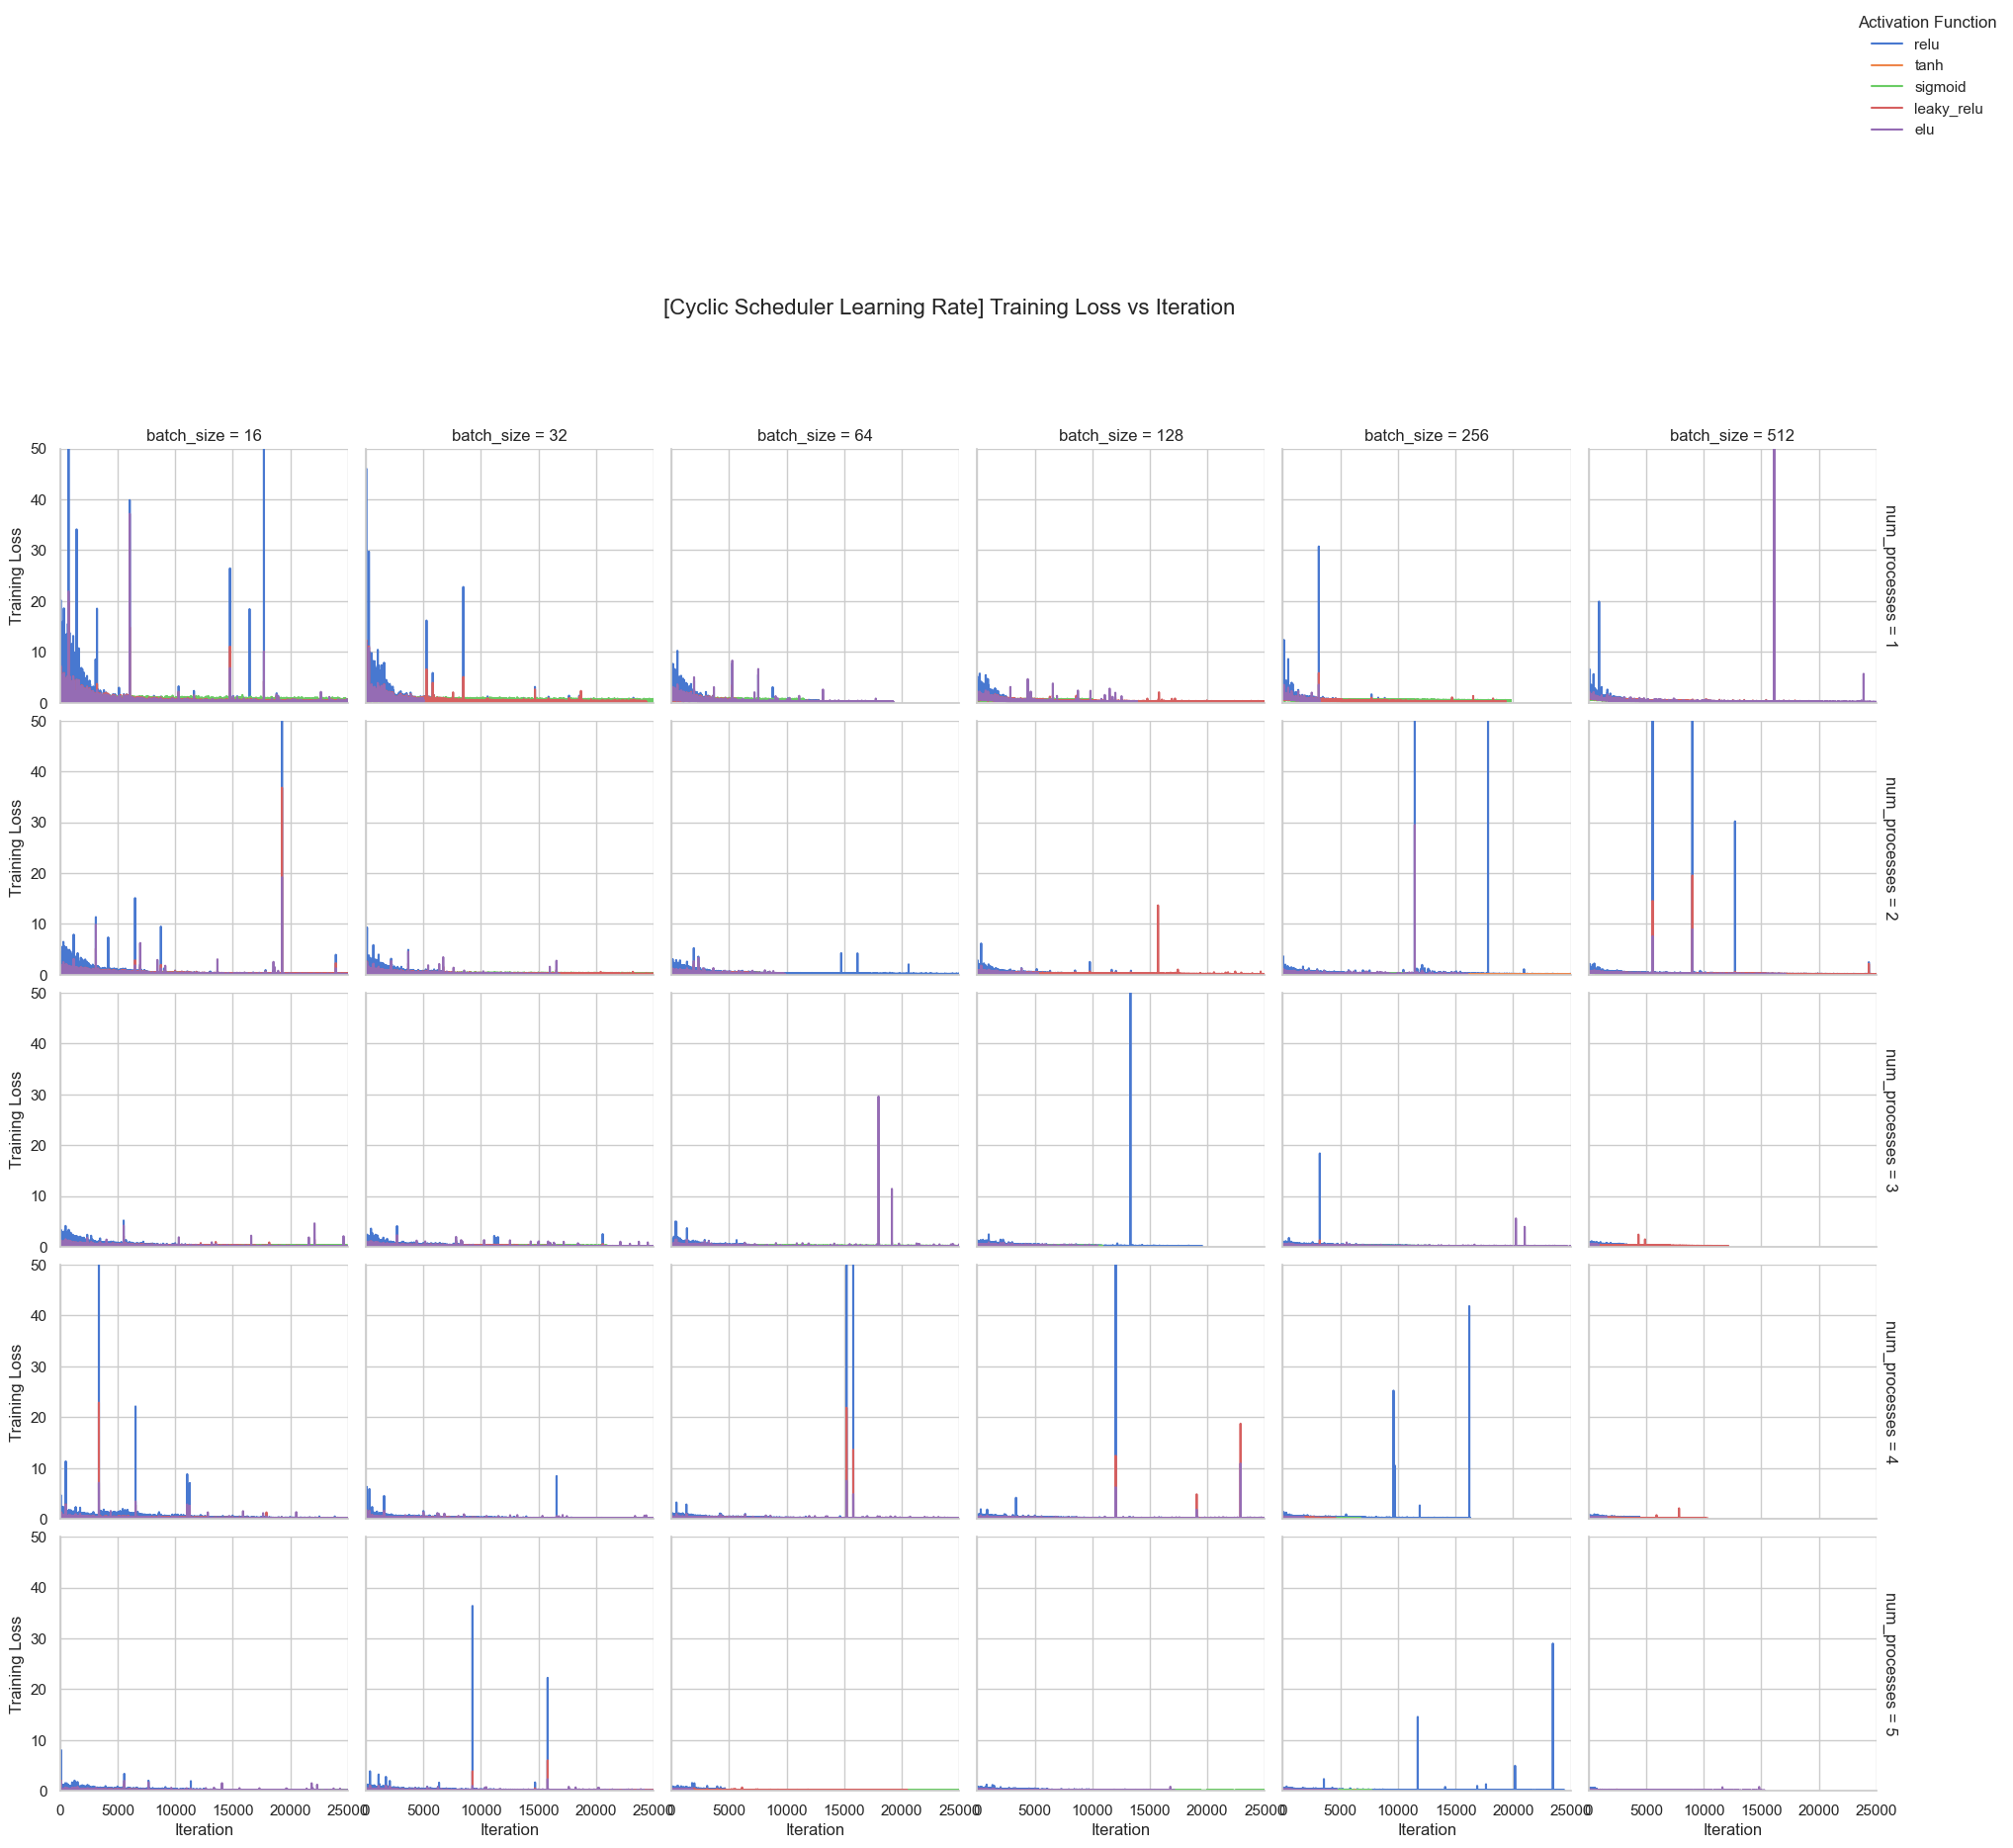

<Figure size 1200x600 with 0 Axes>

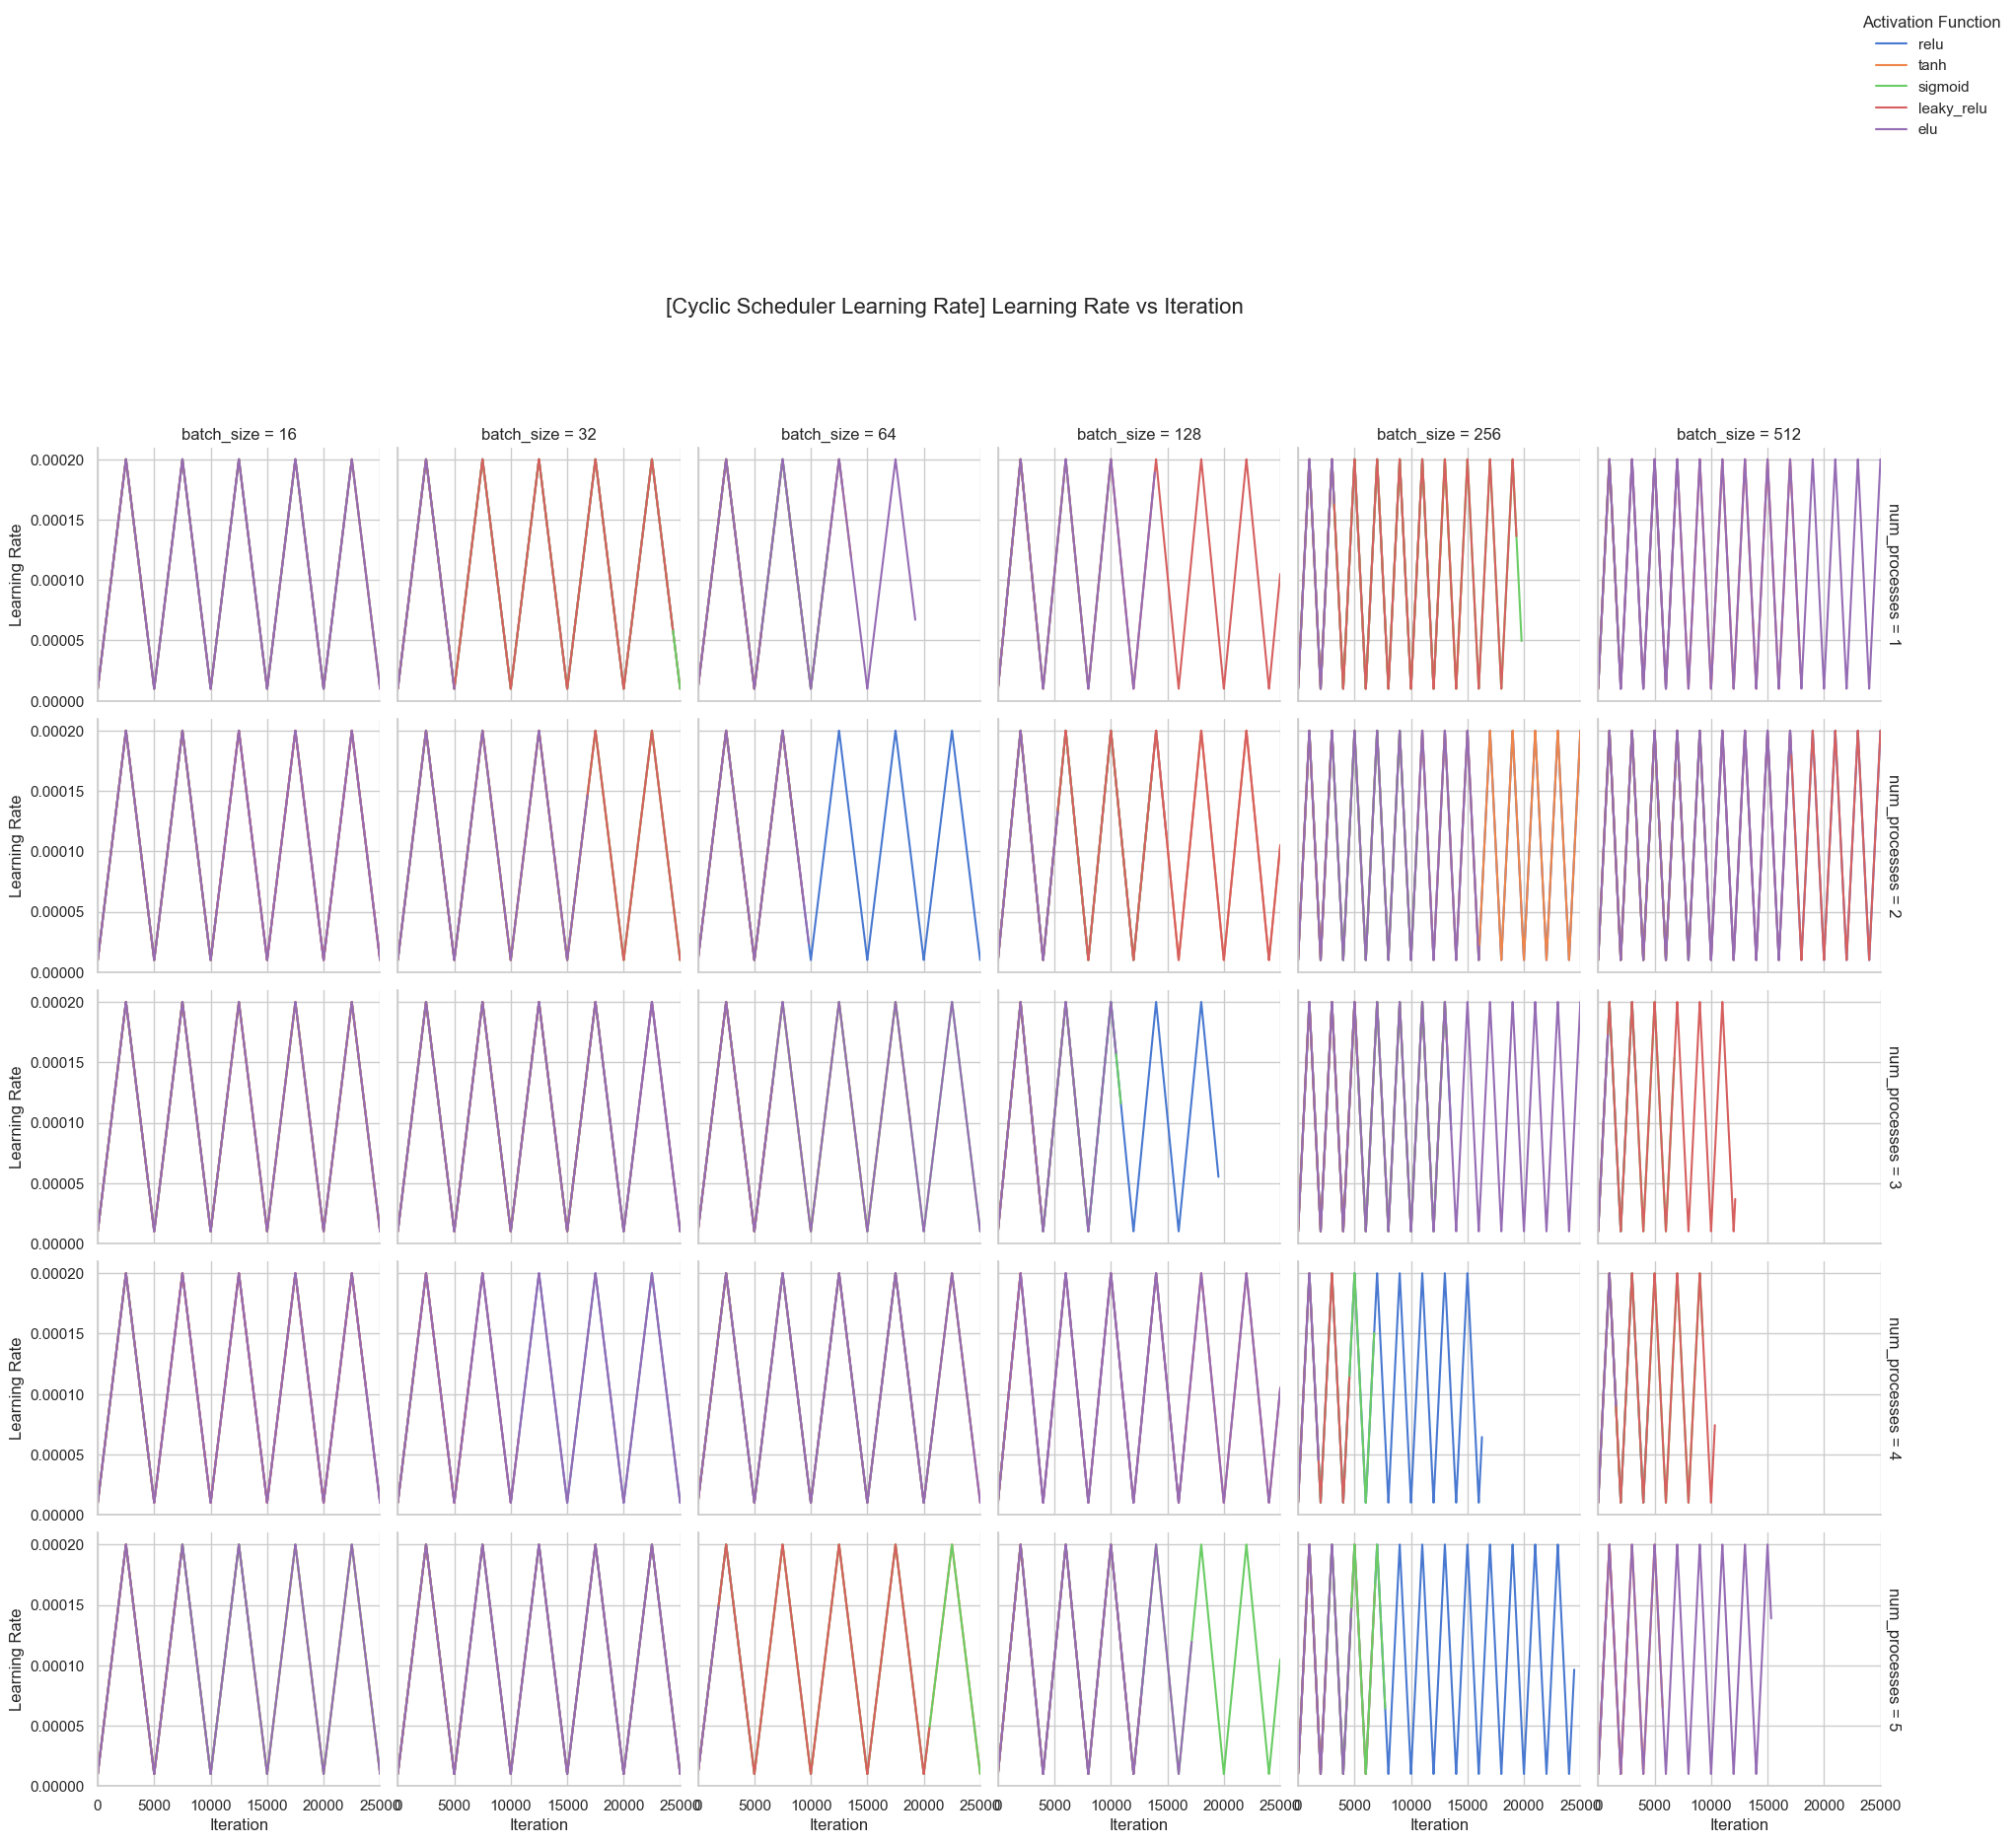

<Figure size 1000x800 with 0 Axes>

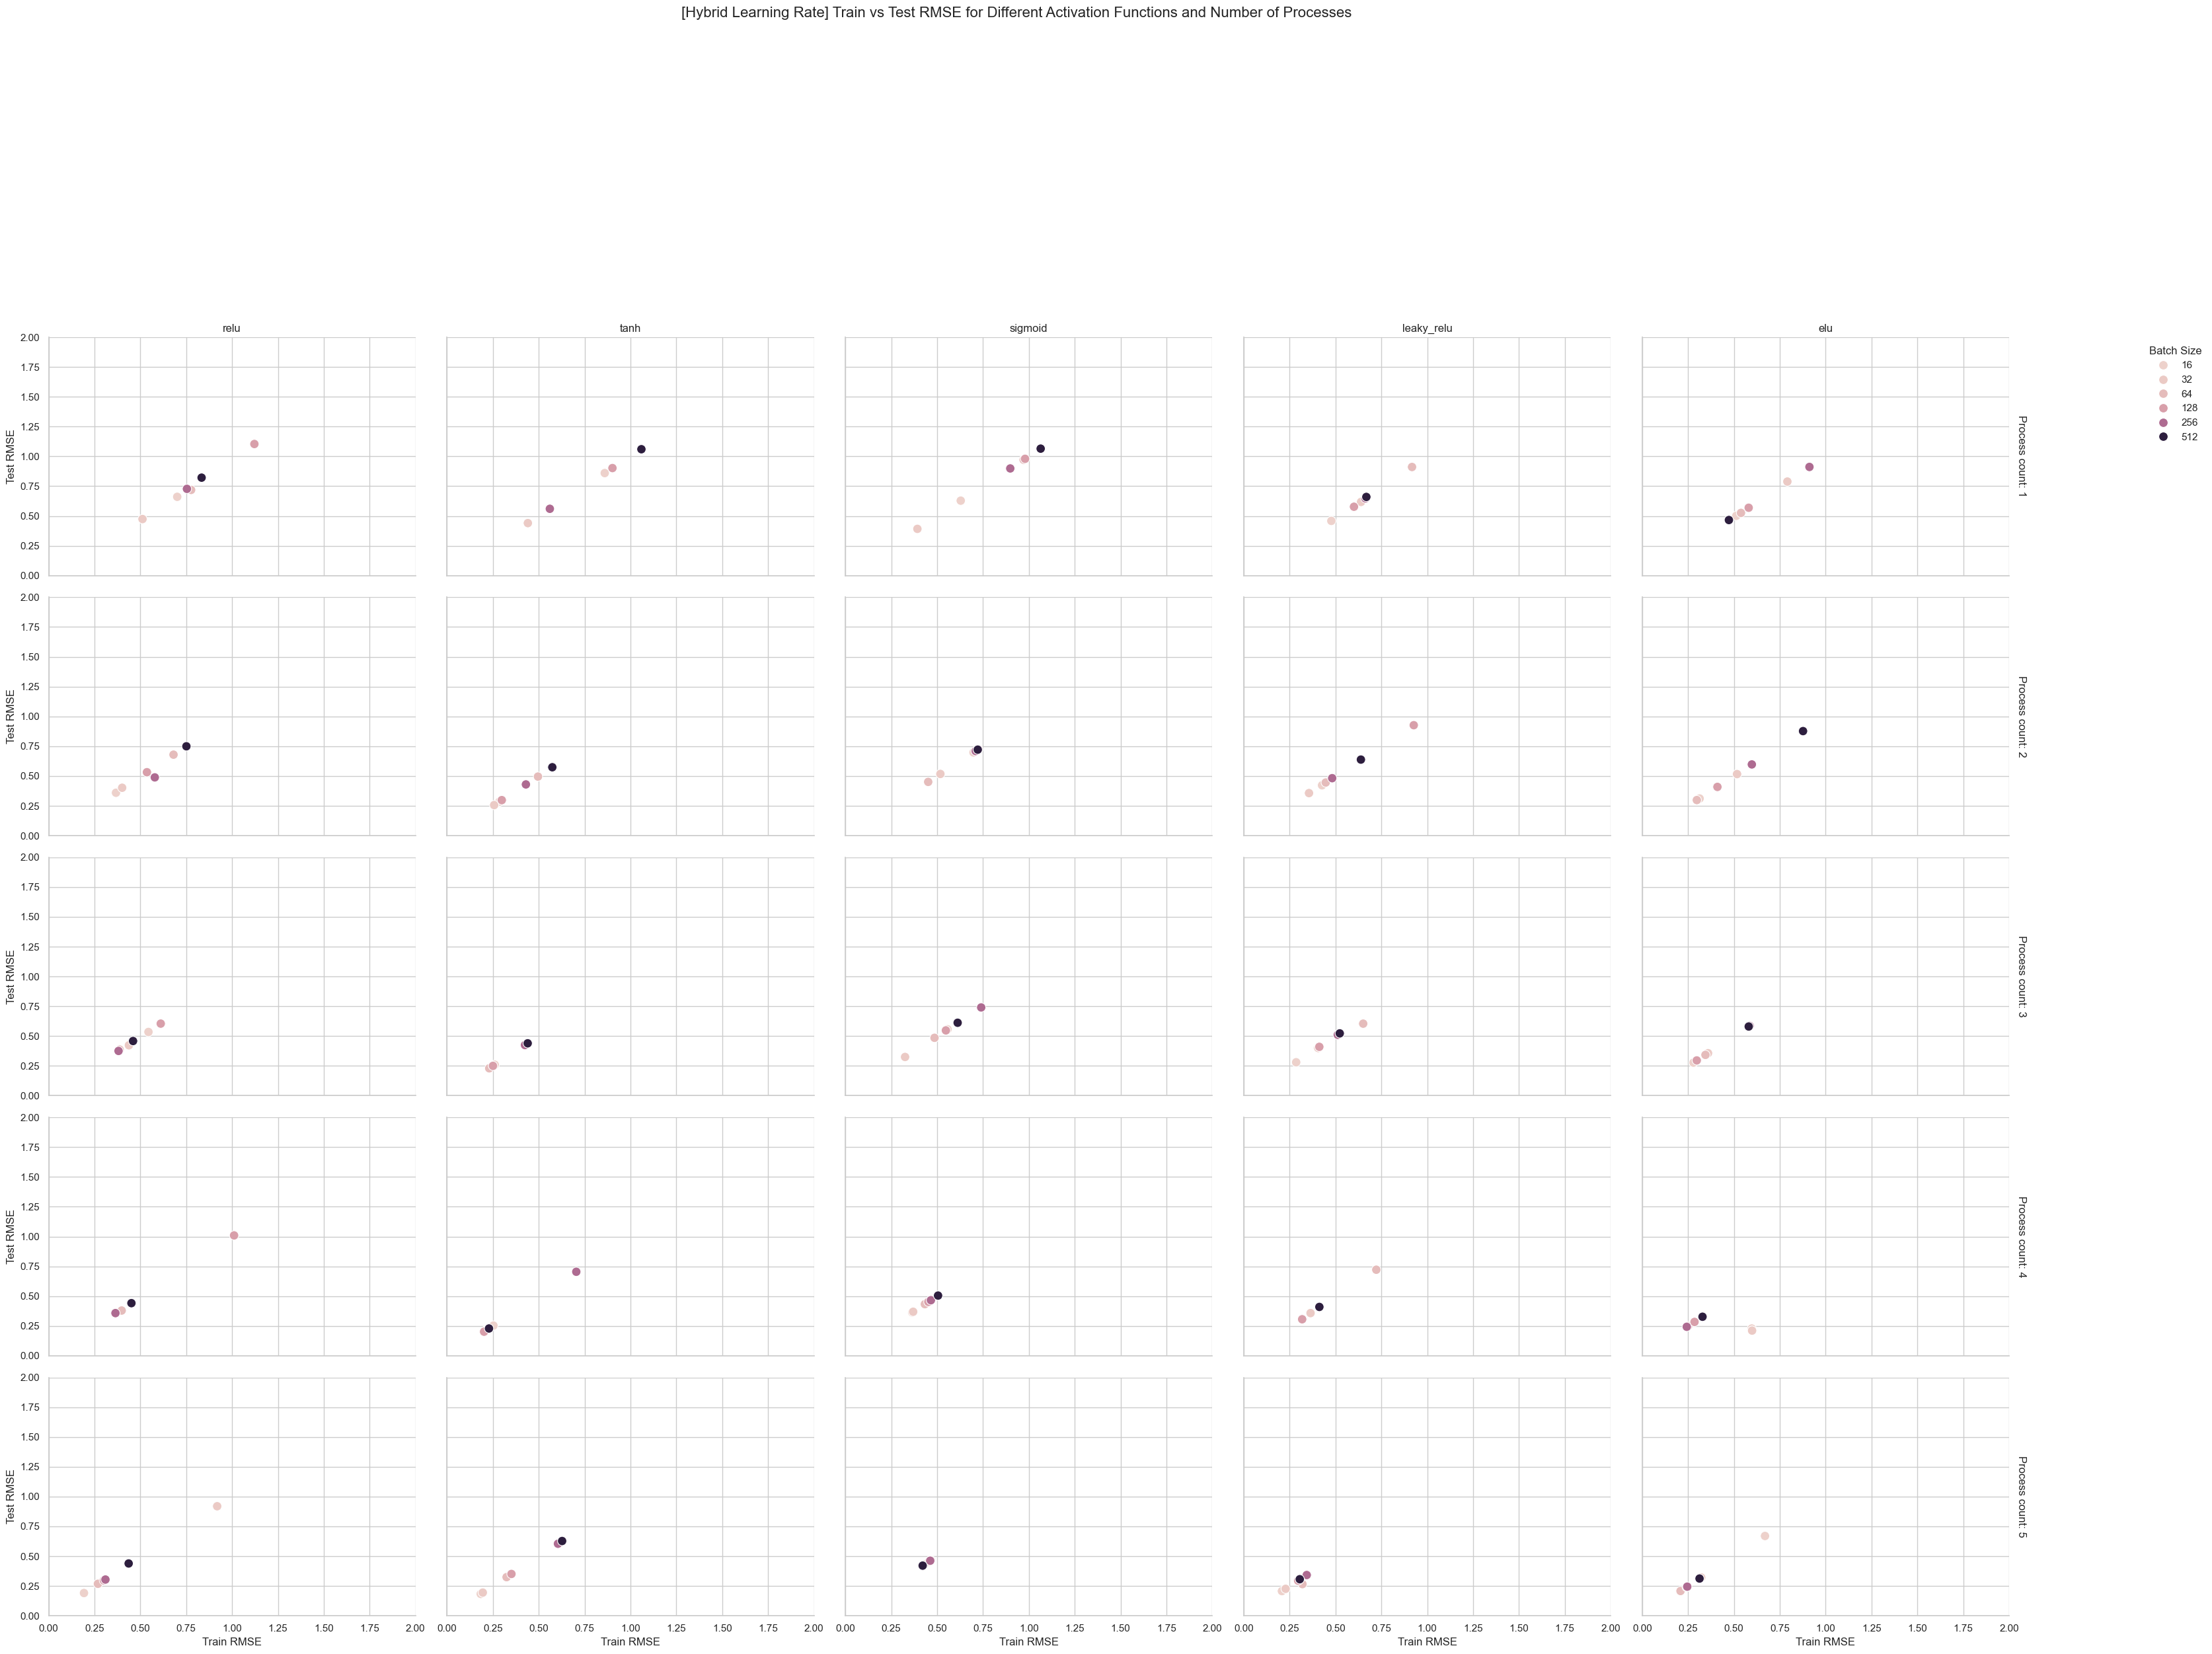

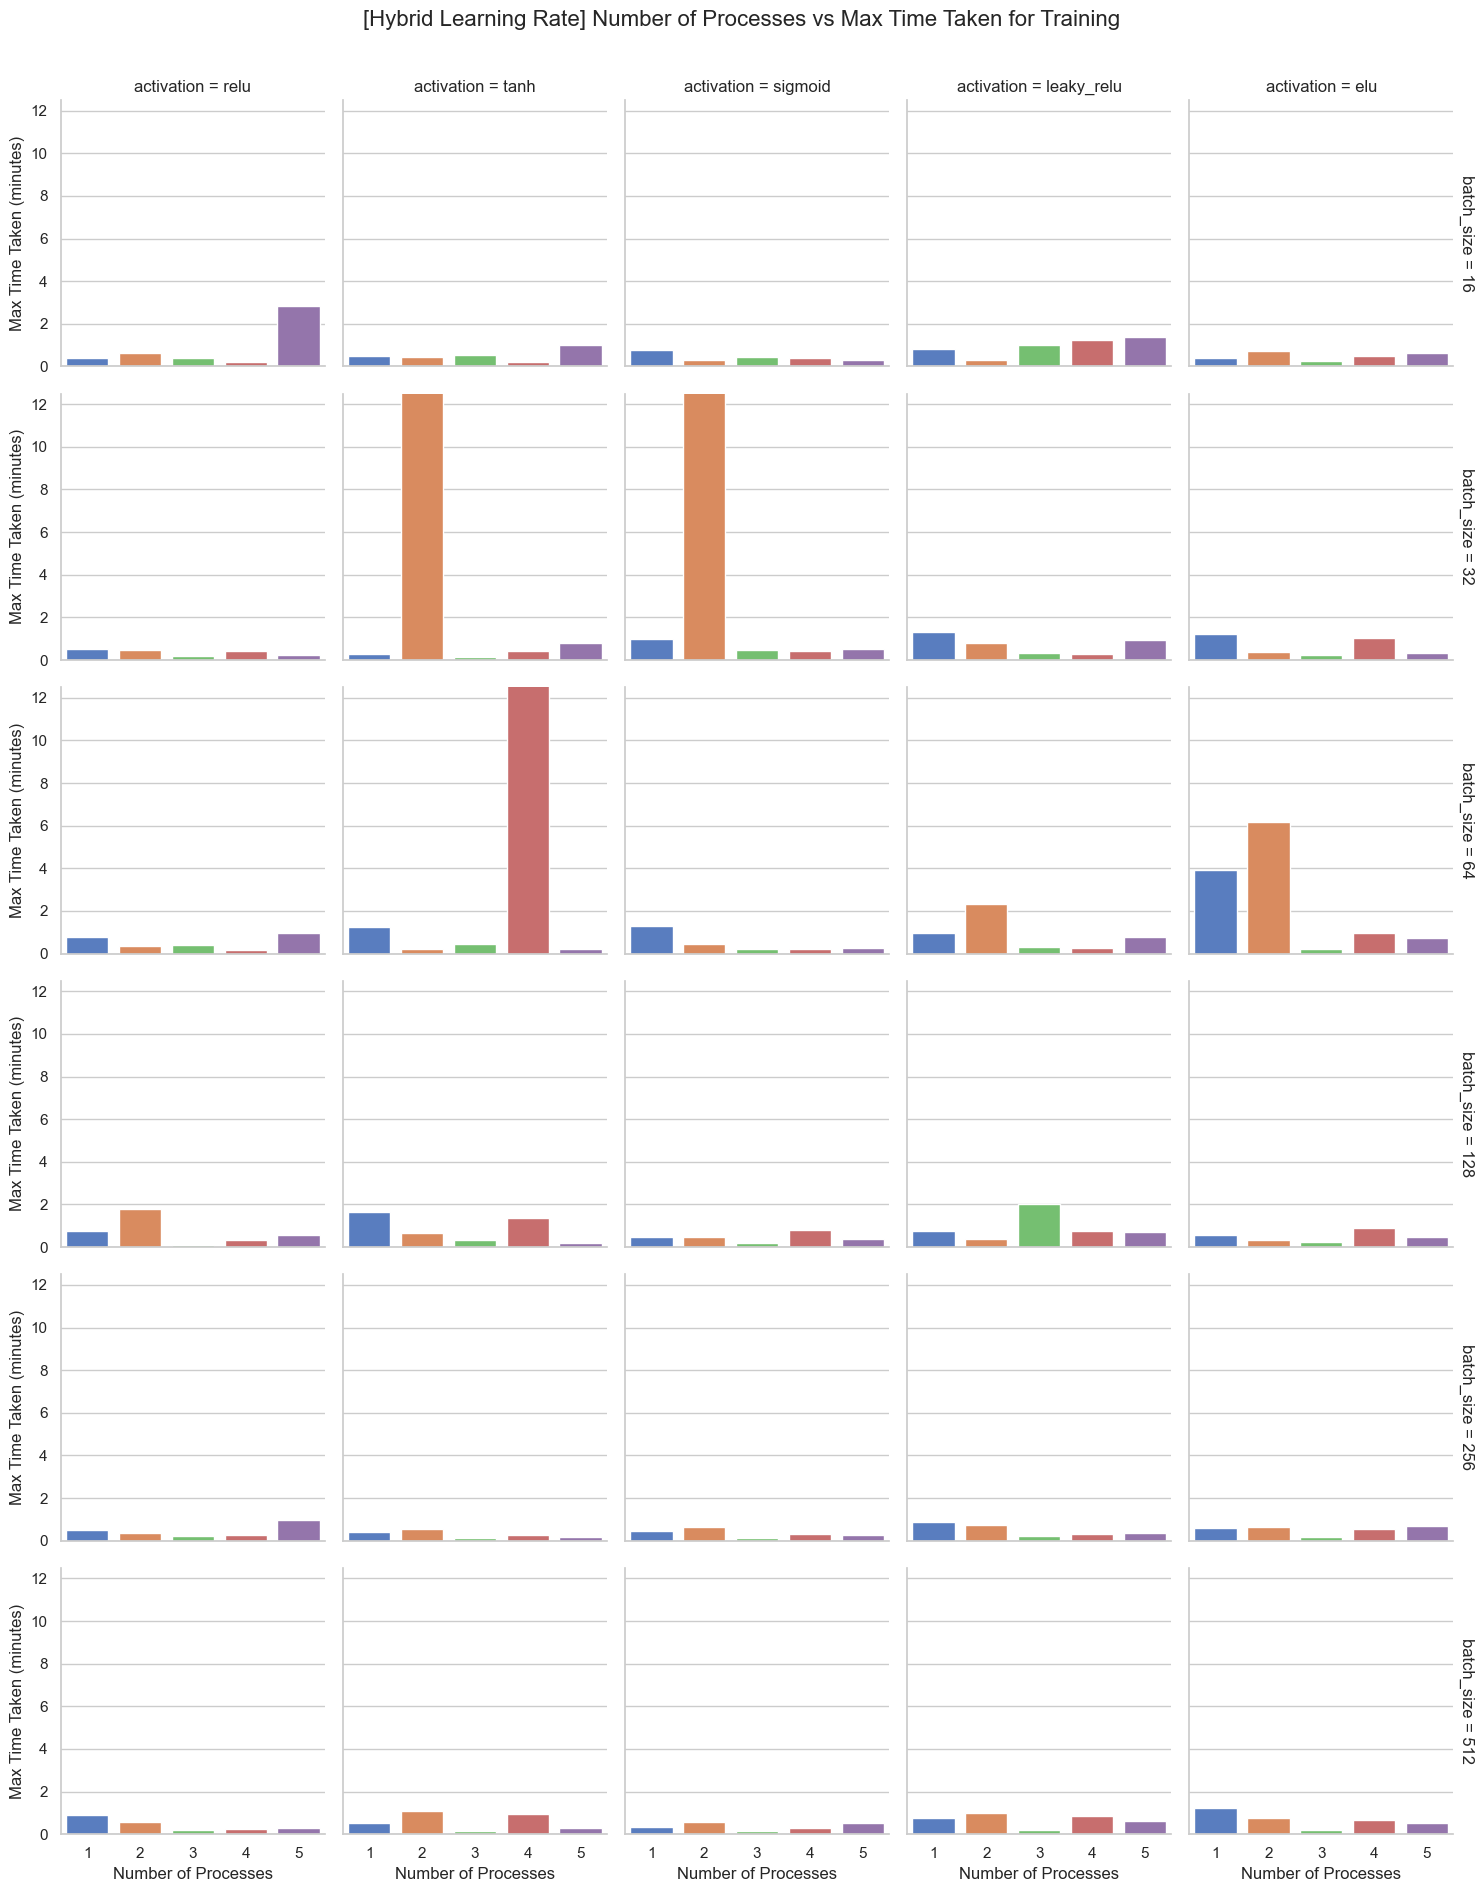

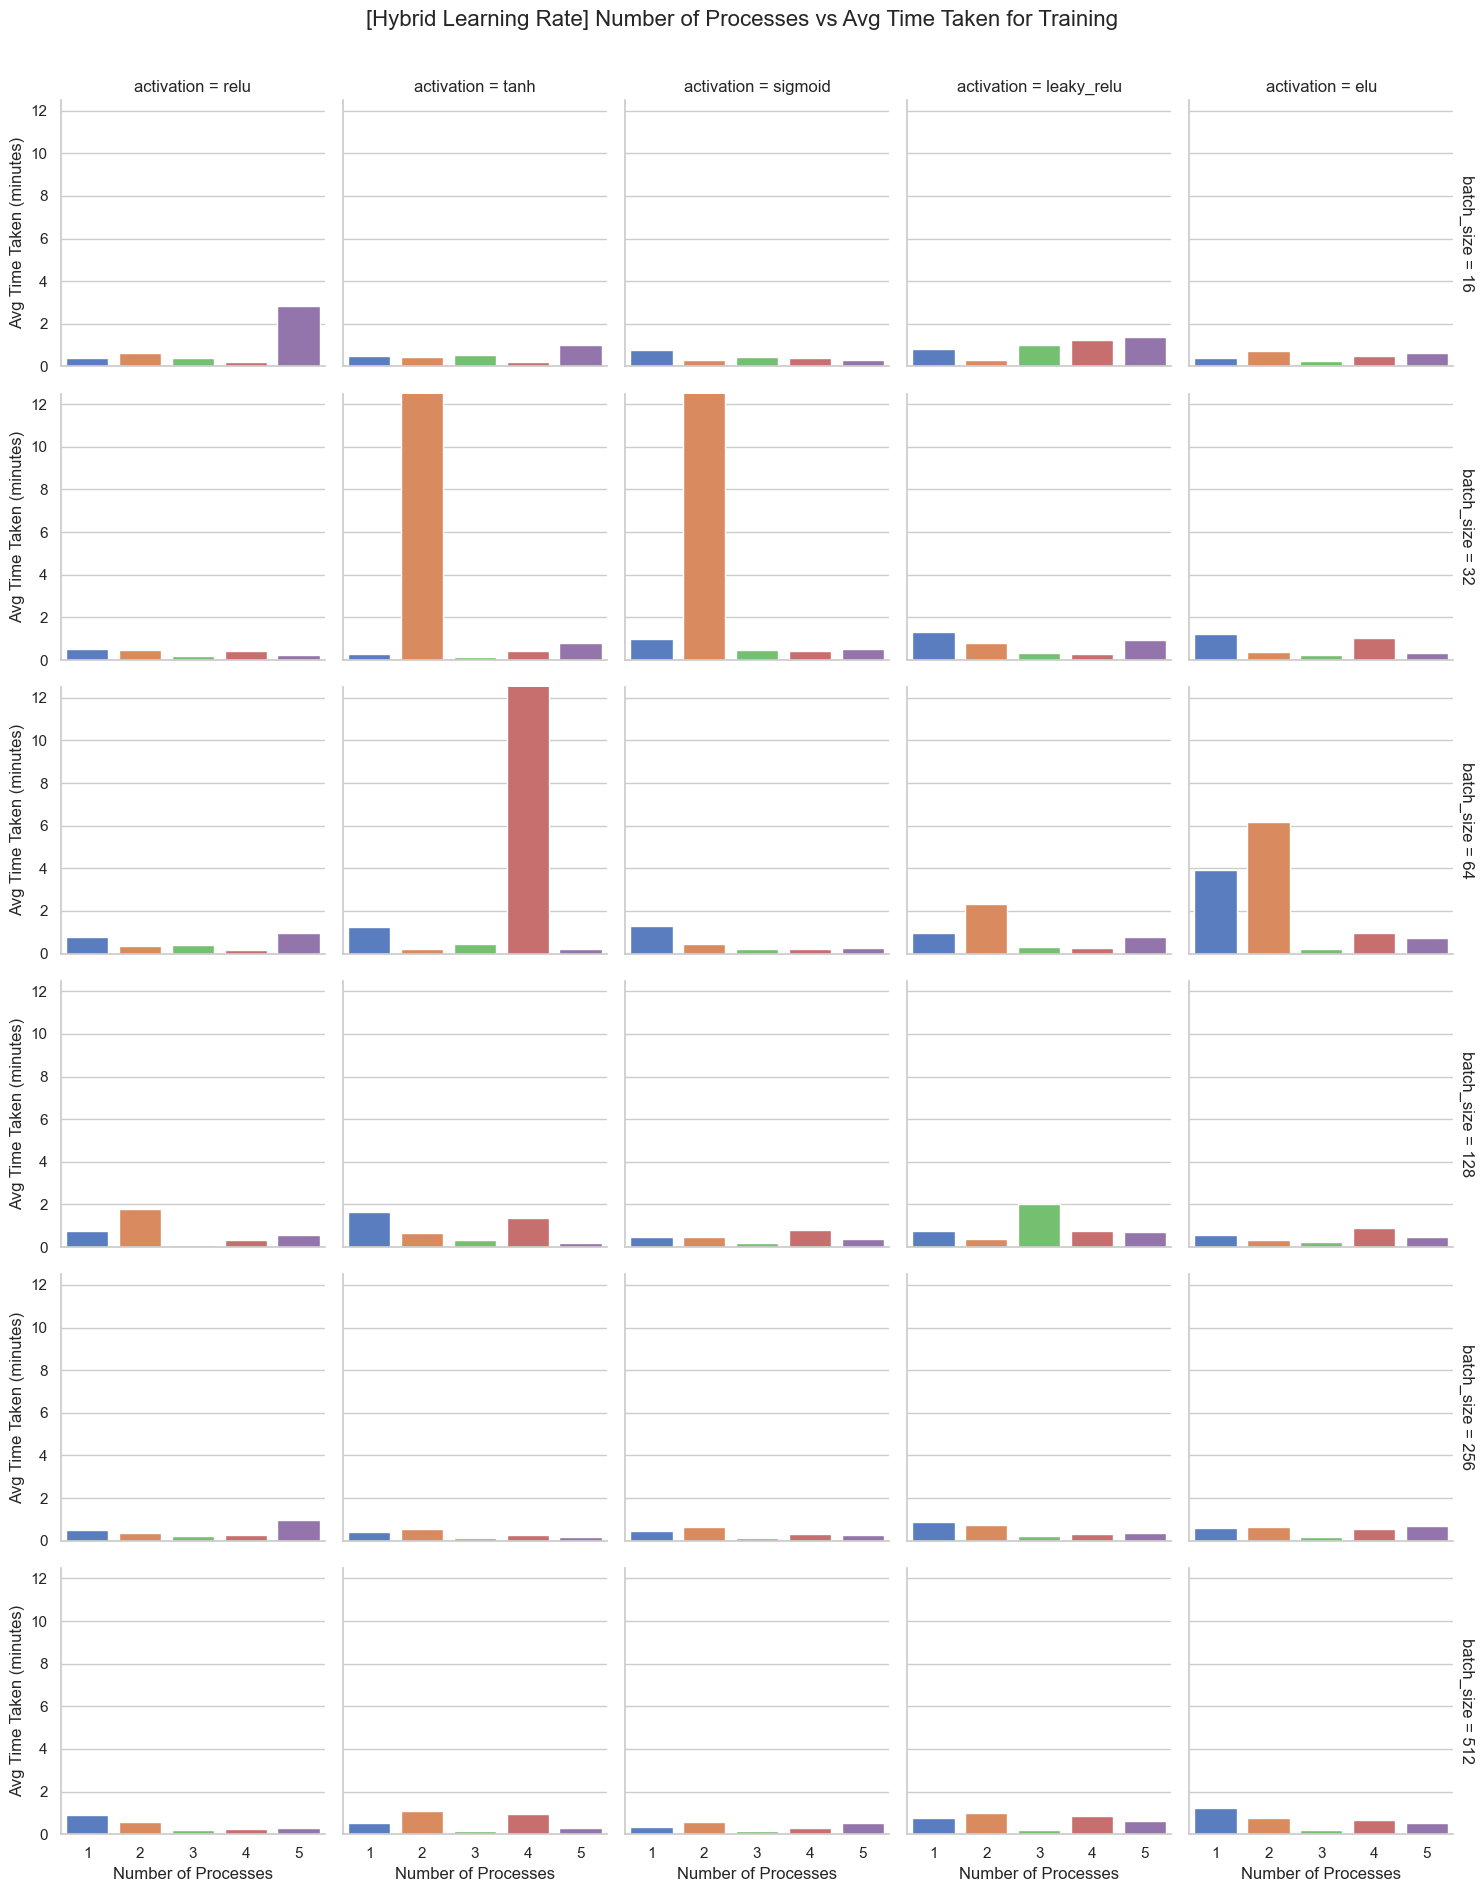

<Figure size 1200x600 with 0 Axes>

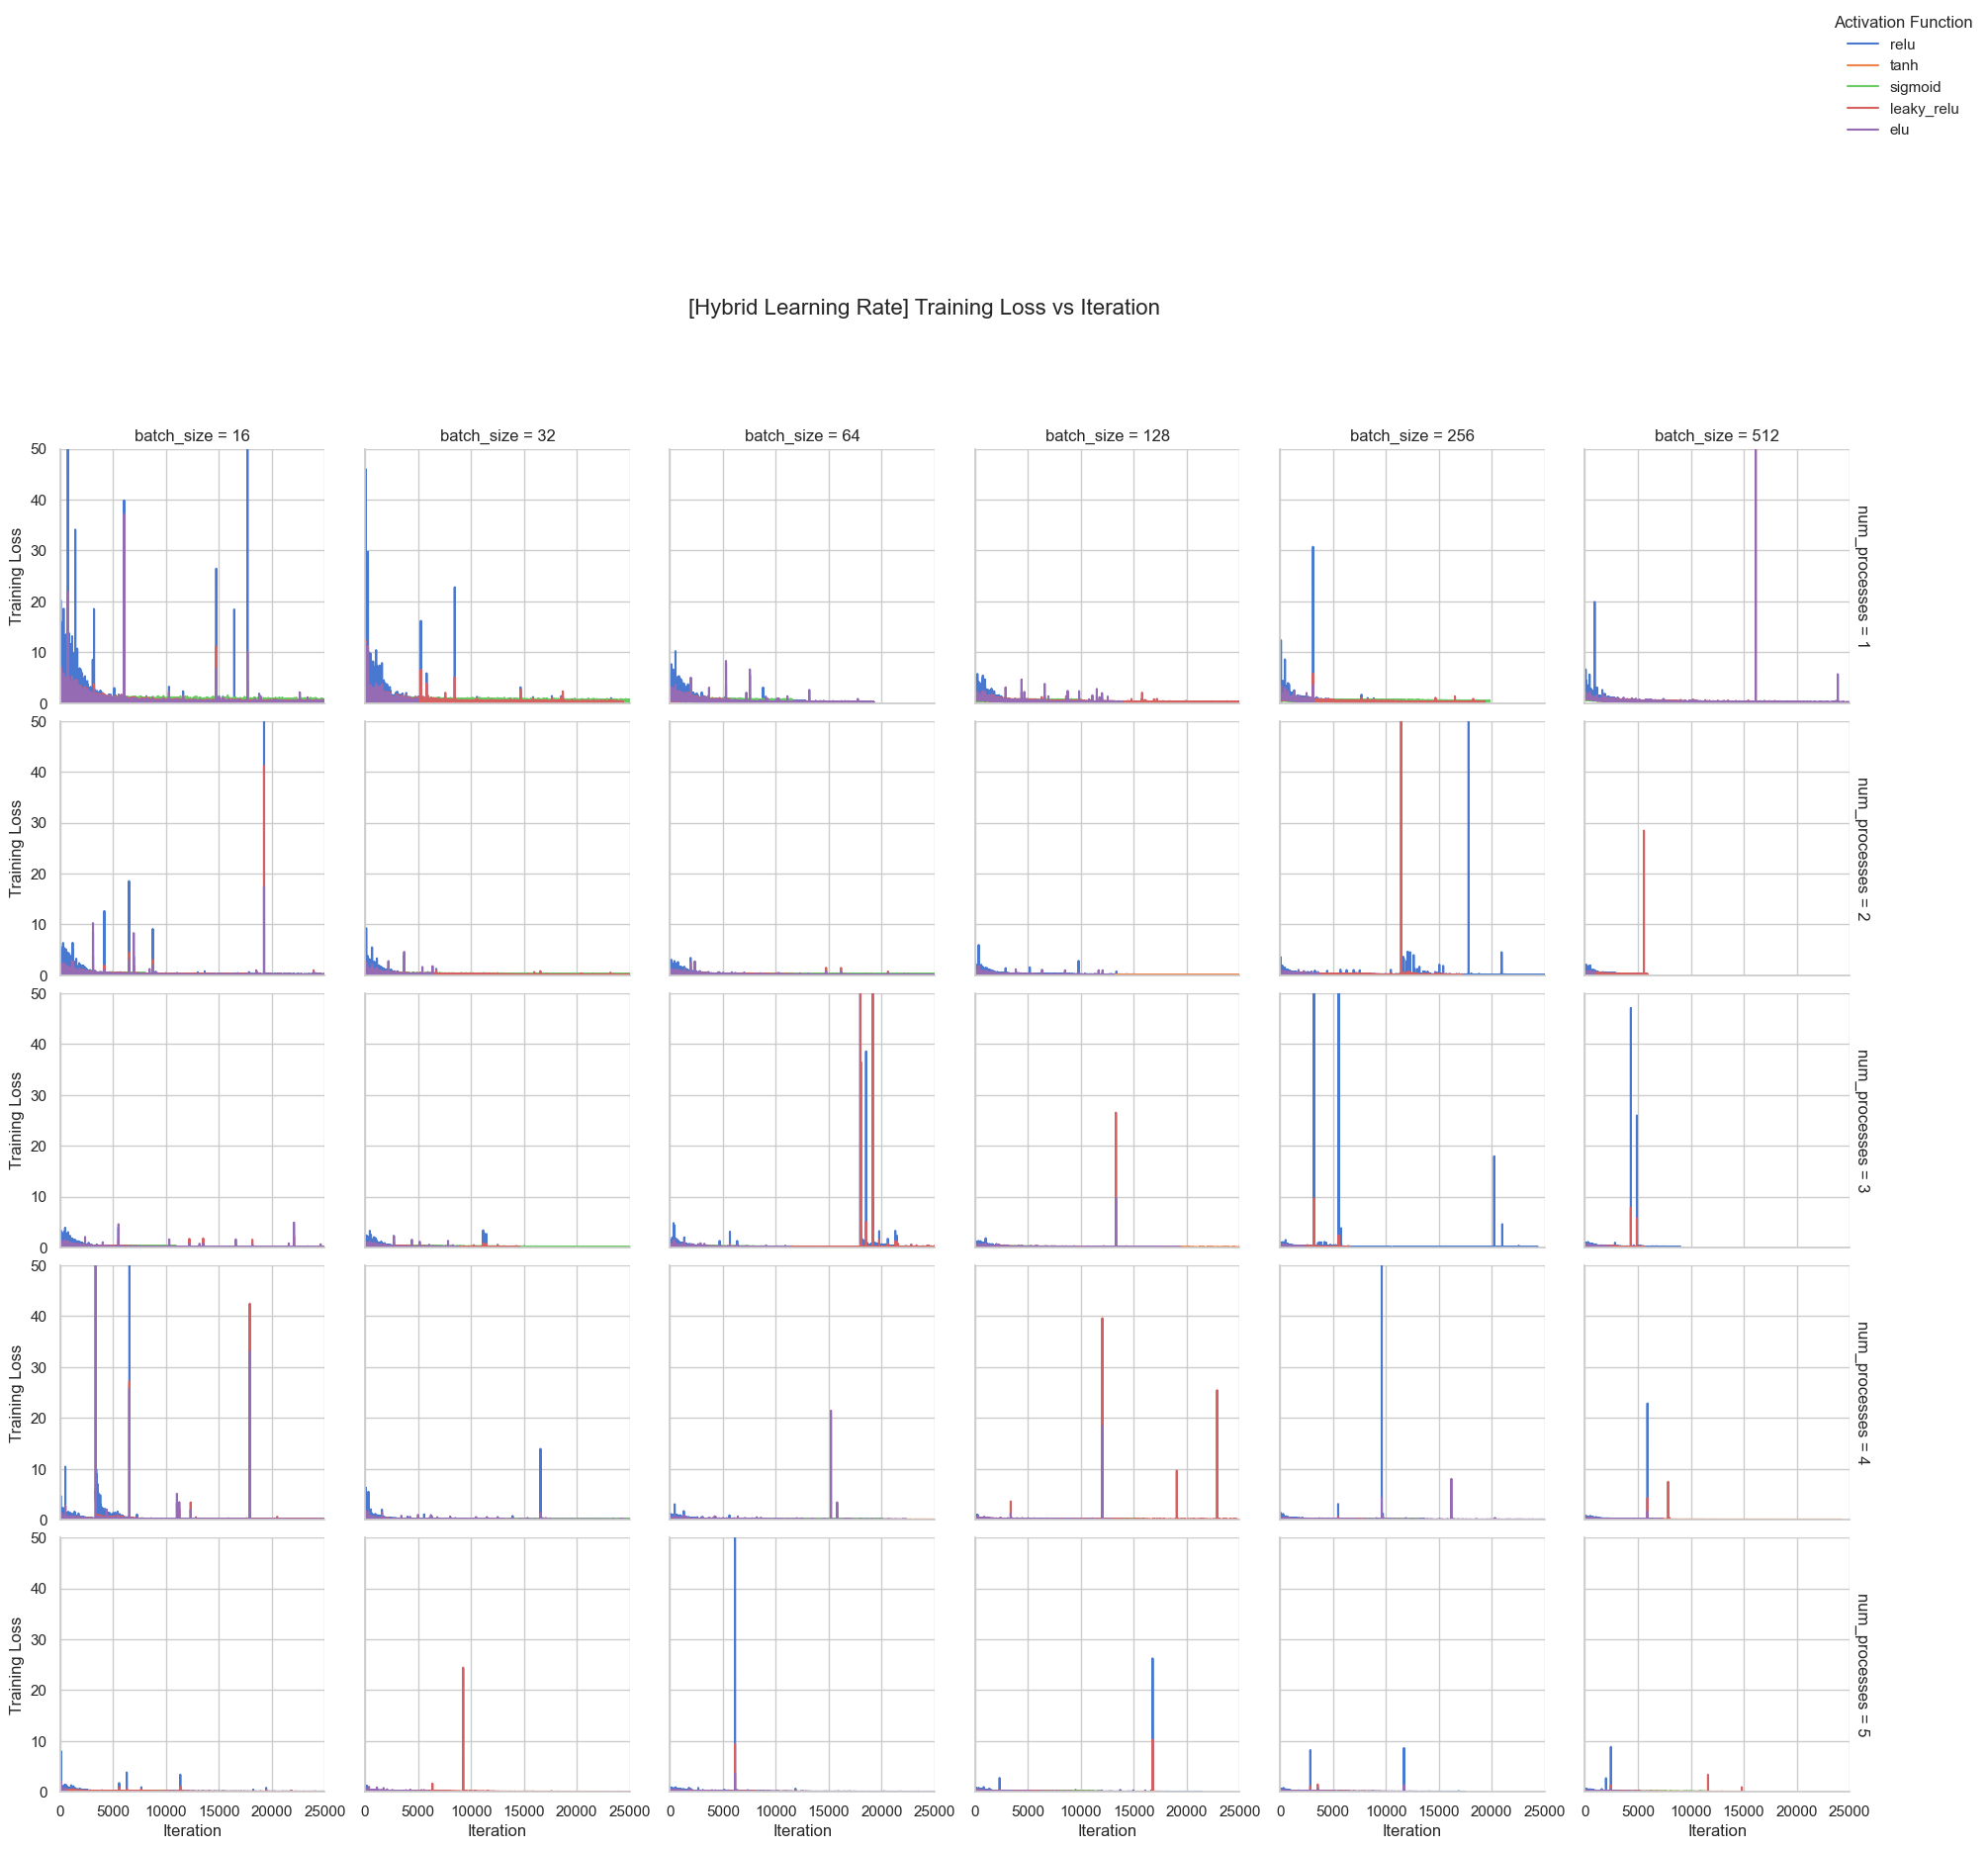

<Figure size 1200x600 with 0 Axes>

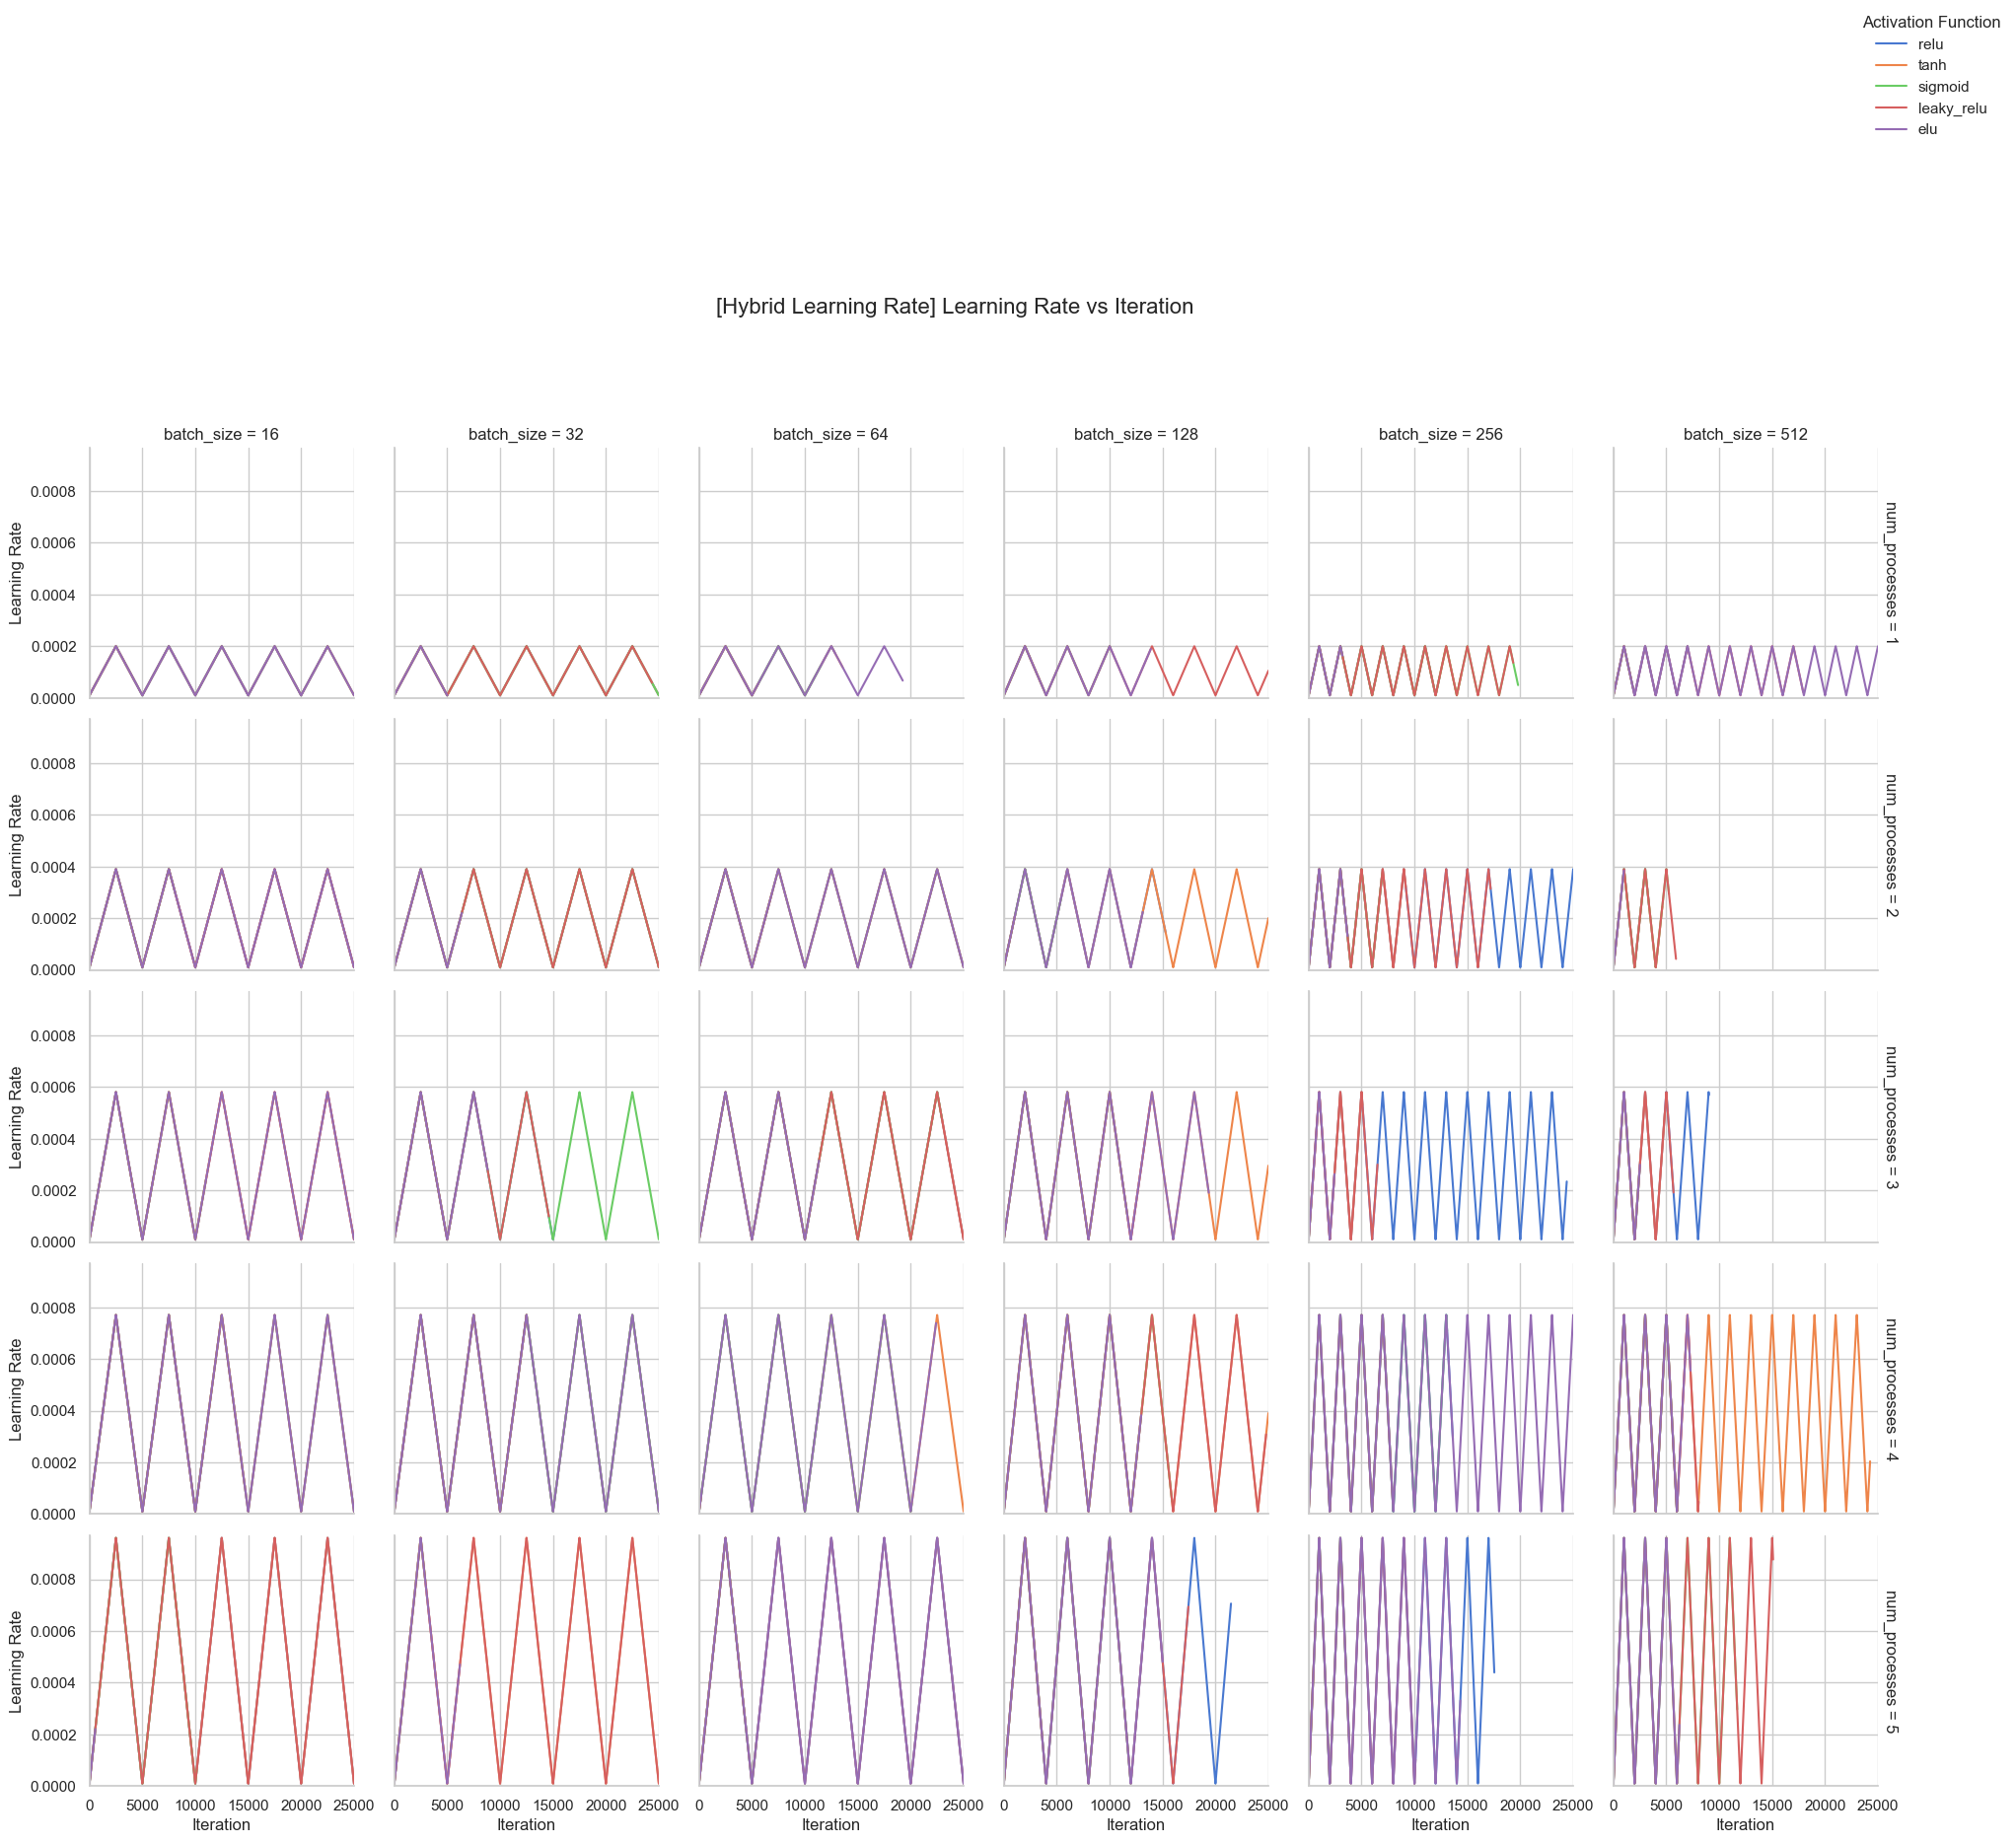

In [9]:
    # Plot parallel processing efficiency (max time taken)
    g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
    g.map_dataframe(sns.barplot, x='num_processes', y='train_time_max', palette='muted', hue ='num_processes', dodge=False)
    g.set_axis_labels("Number of Processes", "Bottleneck Process Time (minutes)")
    plt.tight_layout()
    plt.ylim(0, 12.5)
    plt.suptitle(f'[{prefix}] Parallel Processing Bottleneck Analysis - Slowest Process Performance', fontsize=16, y=1.05)
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/process_train_time_max.png', bbox_inches='tight')
    plt.show()

    # Plot average distributed performance (avg time taken) 
    g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
    g.map_dataframe(sns.barplot, x='num_processes', y='train_time_avg', palette='muted', hue ='num_processes', dodge=False)
    g.set_axis_labels("Number of Processes", "Average Process Time (minutes)")
    plt.tight_layout()
    plt.ylim(0, 12.5)
    plt.suptitle(f'[{prefix}] Distributed Computing Efficiency - Average Process Performance', fontsize=16, y=1.05)
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/process_train_time_avg.png', bbox_inches='tight')
    plt.show()

    # Plot convergence behavior (training loss vs iteration)
    training_data = pd.read_csv(f'{data_path}/training_metrics.csv', header=0)
    plt.figure(figsize=(12, 6))
    g = sns.FacetGrid(training_data, col="batch_size", row="num_processes", margin_titles=True, hue="activation", palette="muted")
    g.map(plt.plot, "iteration", "training_loss")
    g.set_axis_labels("Iteration", "Training Loss")
    g.add_legend(bbox_to_anchor=(1.05, 1.25), loc='upper right', title='Activation Function')
    plt.suptitle(f'[{prefix}] Convergence Stability and Speed Analysis', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.ylim(0, 50)
    plt.xlim(0, 25000)
    plt.savefig(f'{save_path}/convergence_analysis.png', bbox_inches='tight')
    plt.show()

    # Plot learning rate adaptation behavior
    plt.figure(figsize=(12, 6))
    g = sns.FacetGrid(training_data, col="batch_size", row="num_processes", margin_titles=True, hue="activation", palette="muted")
    g.map(plt.plot, "iteration", "learning_rate")
    g.set_axis_labels("Iteration", "Learning Rate")
    g.add_legend(bbox_to_anchor=(1.05, 1.25), loc='upper right', title='Activation Function')
    plt.suptitle(f'[{prefix}] Learning Rate Scaling and Adaptation Patterns', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.ylim(0, training_data['learning_rate'].max() +1e-5)
    plt.xlim(0, 25000)
    plt.savefig(f'{save_path}/learning_rate_adaptation.png', bbox_inches='tight')
    plt.show()

In [10]:
# get the top 5 best test RMSE models from each of the three data sets and print them out
def print_top_5_models(data_path, description):
    data = pd.read_csv(f'{data_path}/train_test_rmse.csv', header=0)
    top_5 = data.nsmallest(5, 'test_rmse')
    # convert train_time_max from seconds to minutes and limit to 2 decimal places
    top_5['train_time_max'] = (top_5['train_time_max'] / 60).round(2)
    top_5 = top_5[['num_processes', 'num_iterations',  'batch_size', 'activation', 'learning_rate', 'train_rmse', 'test_rmse', 'train_time_max']]
    print(f'Top 5 models for {description}:')
    print(top_5)
    top_5.to_csv(f'{data_path}/top_5_models.csv', index=False)

print_top_5_models('../../logs/normalization_fix/new', 'Constant Learning Rate')
print_top_5_models('../../logs/normalization_fix/cyclic_without_size_factor', 'Cyclic Scheduler Learning Rate')
print_top_5_models('../../logs/normalization_fix/cyclic_with_size_factor', 'Hybrid Learning Rate')
print_top_5_models('../../logs/normalization_fix/final', 'Hybrid Learning Rate with stricter stopping criteria')

Top 5 models for Constant Learning Rate:
     num_processes  num_iterations  batch_size  activation  learning_rate  \
91               4          109129          16        tanh        0.00001   
64               3          120067          16         elu        0.00001   
122              5           68090          16     sigmoid        0.00001   
93               4          138578          16  leaky_relu        0.00001   
126              5           48998          32        tanh        0.00001   

     train_rmse  test_rmse  train_time_max  
91     0.449943   0.449951            2.78  
64     0.475215   0.474462            3.79  
122    0.478182   0.478231            1.44  
93     0.507784   0.506763            4.11  
126    0.518215   0.518242            1.05  
Top 5 models for Cyclic Scheduler Learning Rate:
     num_processes  num_iterations  batch_size activation  learning_rate  \
131              5           98349          64       tanh       0.000135   
124              5       